<a href="https://colab.research.google.com/github/jeramirez169/An-lisis-exploratorio-de-datos/blob/main/Final_2025-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

----

# Examen Parcial Práctico: Regularización, Regresión y Clasificación

_Primer Semestre_

En este examen práctico se evaluarán los siguientes conceptos:
- Regularización Lasso y Ridge en modelos de regresión y clasificación.
- El parámetro C (inverso de la fuerza de regularización).
- Regresión logística y la interpretación de sus coeficientes.
- Técnicas de validación cruzada (por ejemplo, stratified k-folds).
- Métricas de clasificación: F1-score, matriz de confusión, classification report, accuracy, recall.

El dataset a utilizar es el **Forest Covertypes** de scikit-learn.  
Para más información consulta:  
[Forest Covertypes dataset](https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes)  
[fetch_covtype documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype)


## Instrucciones

1. **Carga y Preprocesamiento:**  
   - Cargar el dataset Forest Covertypes utilizando `sklearn.datasets.fetch_covtype`.
   - Realizar un análisis exploratorio y dividir el dataset en conjuntos de entrenamiento y prueba.
   - (Opcional) Estandarizar los predictores, ya que las técnicas de regularización son sensibles a la escala.

2. **Modelos de Regresión Regularizada:**  
   - Implementa modelos de regresión Ridge y Lasso sobre un problema de regresión (puedes transformar el problema en uno binario o utilizar un subconjunto).
   - Analiza el efecto del parámetro de regularización λ (alpha) sobre la magnitud de los coeficientes.

3. **Modelo de Clasificación:**  
   - Implementa un modelo de regresión logística regularizada (puedes utilizar L1 o L2) para clasificar el dataset original.
   - Interpreta los coeficientes obtenidos, considerando la relación entre los predictores y la variable respuesta.

4. **Validación Cruzada:**  
   - Utiliza Stratified K-Folds (por ejemplo, 5 folds) para evaluar el desempeño del modelo de clasificación.
   - Calcula las métricas (accuracy, recall, F1-score, matriz de confusión y classification report) tanto en validación cruzada como en el conjunto de prueba.

5. **Comentarios y Explicaciones:**  
   - Cada bloque de código debe incluir comentarios explicativos y, cuando sea necesario, fórmulas en los bloques Markdown por ejemplo, la fórmula del F1-score:  
     $$
     F1 = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
     $$.

----------

A continuación, se muestra el código base del examen:


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Cargar el dataset Forest Covertypes

In [2]:
data = fetch_covtype()
X = data.data
y = data.target

## Paso 1: Análisis Exploratorio y Preprocesamiento

Realice un análisis exploratorio riguroso del dataset. Se recomienda:

- Convertir el dataset a un `DataFrame` de pandas y visualizar las primeras filas usando `.head()`.
- Revisar las dimensiones del DataFrame (número de filas y columnas) con `.shape`.
- Verificar la tipología de las variables, determinando cuántas son numéricas y cuántas son categóricas.
- Comprobar si existen valores nulos en cada columna.
- Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas.
- Realizar un análisis univariado mediante histogramas, boxplots y scatterplots (comparando cada variable numérica con la variable objetivo).
- Analizar la distribución de la variable objetivo mediante `value_counts()` y gráficos, para detectar posibles desbalances en el dataset.
- Aplicar técnicas de normalización/estandarización (por ejemplo, Z-Score con StandardScaler y Min-Max Scaling) sobre los predictores.

Este análisis exploratorio (EDA) es fundamental para entender la estructura y calidad del dataset antes de proceder con el modelado.


# Preprocesamiento

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Convertir el dataset a DataFrame

In [4]:
df = pd.DataFrame(X, columns=data.feature_names if hasattr(data, 'feature_names')
                else [f"Feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Visualizar las primeras filas y dimensiones del DataFrame

In [7]:
print(df.shape)
print(df.head())

(581012, 55)
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   
2     2804.0   139.0    9.0                             268.0   
3     2785.0   155.0   18.0                             242.0   
4     2595.0    45.0    2.0                             153.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   
2                            65.0                           3180.0   
3                           118.0                           3090.0   
4                            -1.0                            391.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   
2          234.0      

# Revisar la tipología de variables

In [31]:
# Verificar la tipología de las variables
print(df.info())

numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

print(f"Número de columnas numéricas: {len(numerical_cols)}")
print(f"Número de columnas categóricas: {len(categorical_cols)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

# Verificar valores nulos en el DataFrame


In [12]:
# Comprobar si existen valores nulos en cada columna
print(df.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


No se evidencian valores nulos en ninguna columna del dataset

# Calcular y visualizar la matriz de correlación de Pearson para las variables numéricas

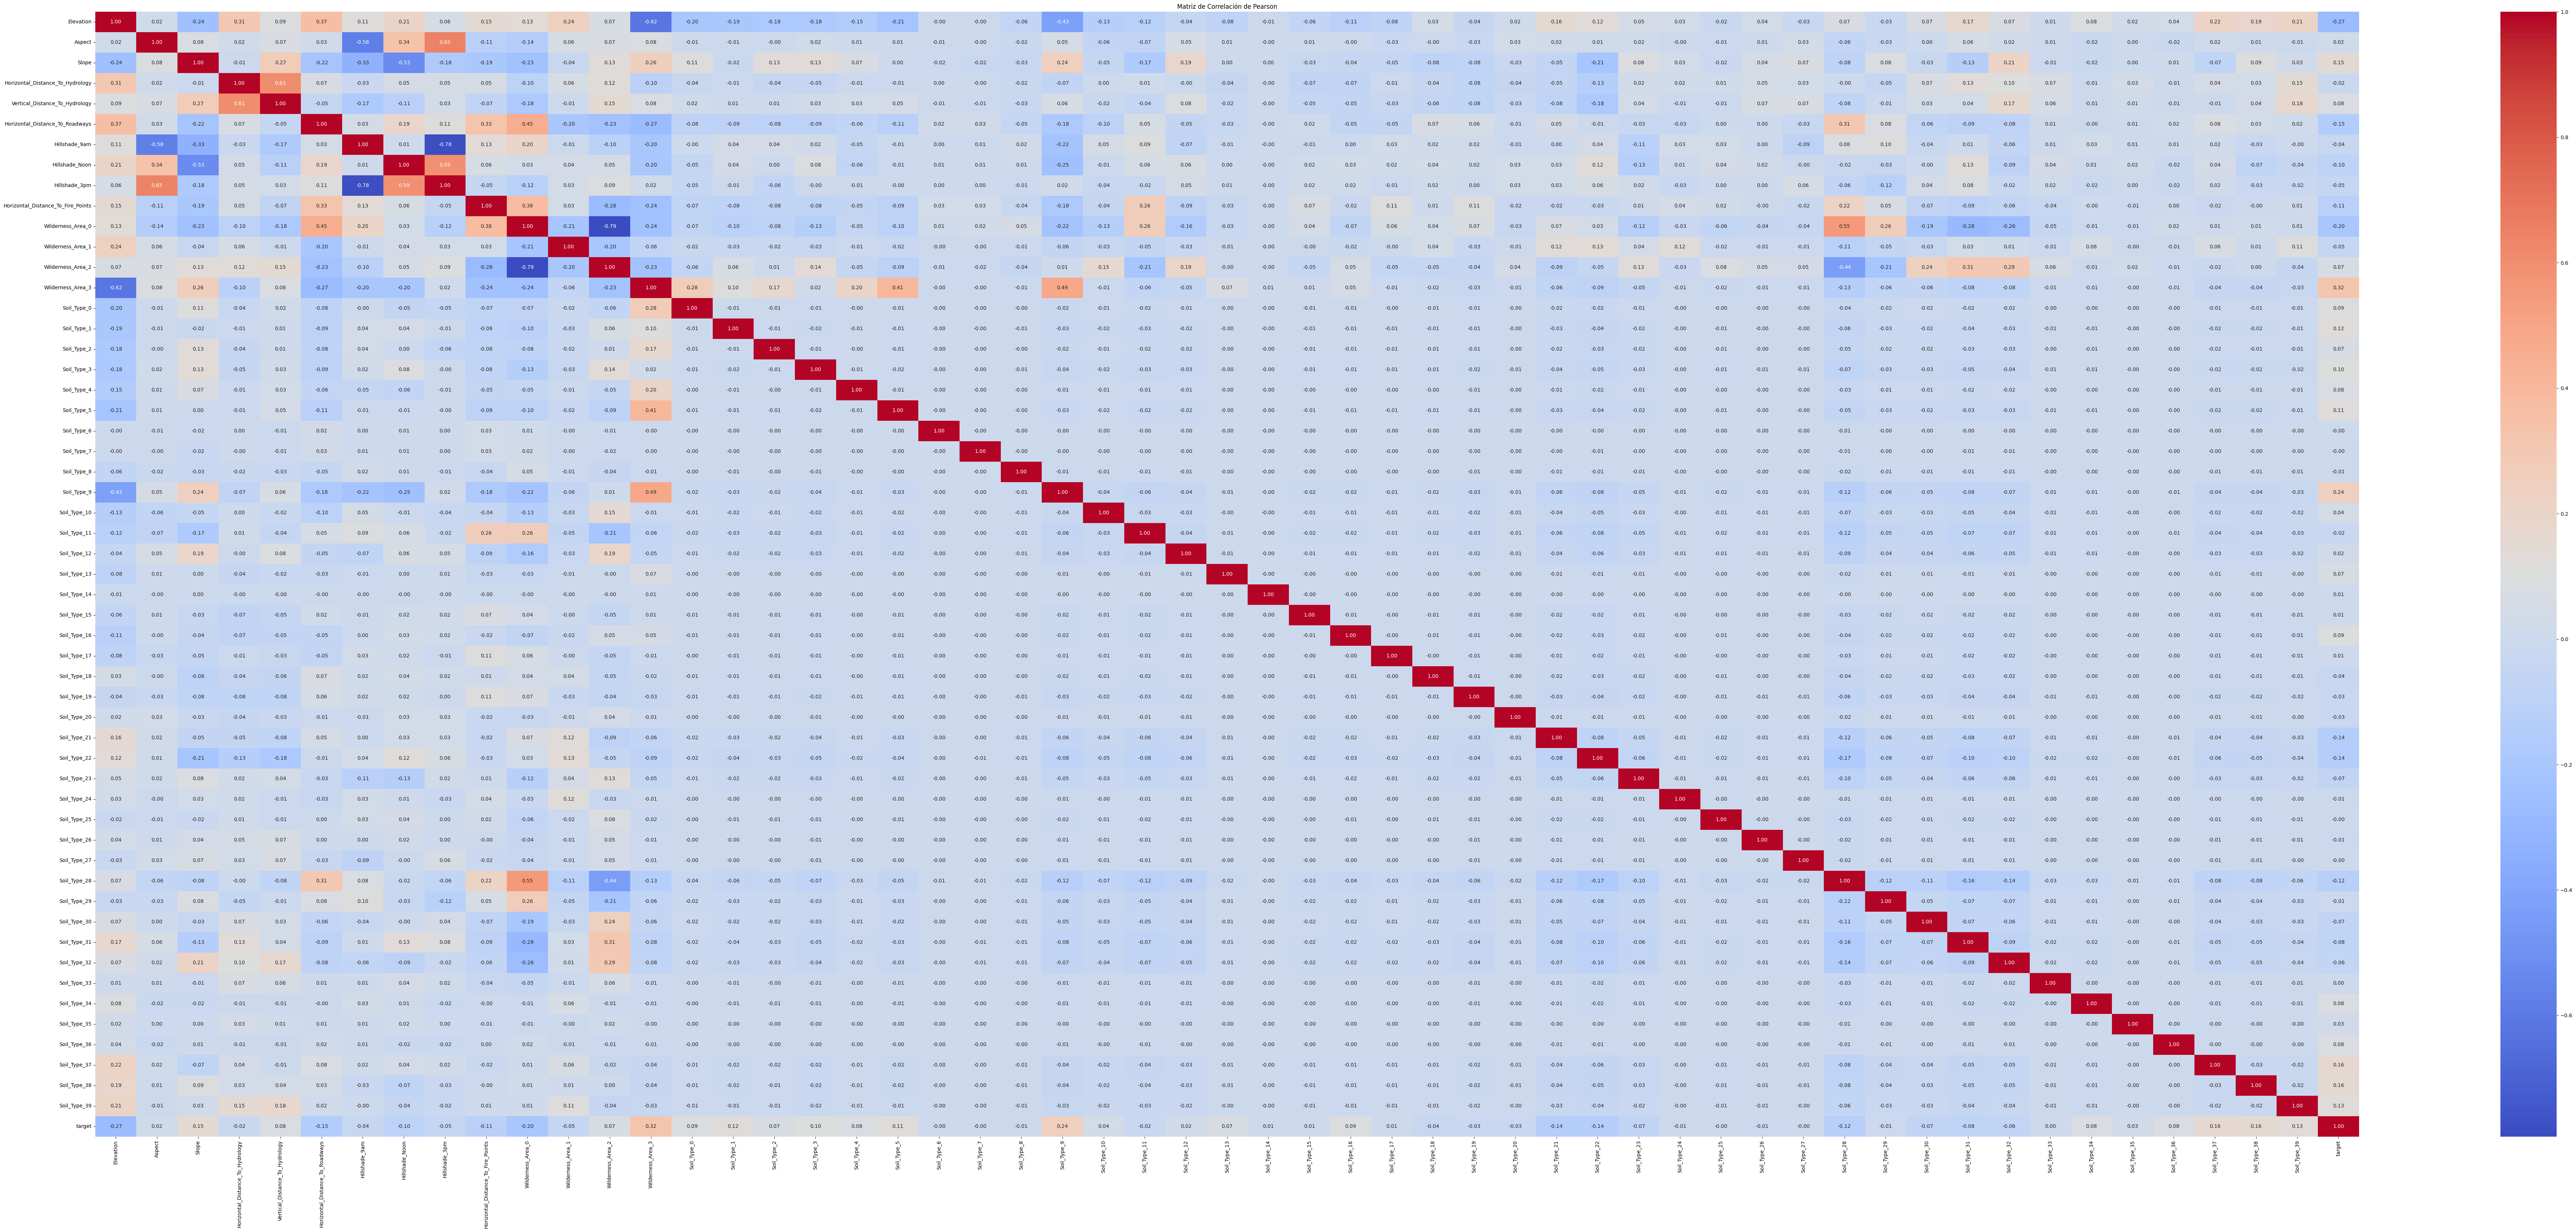

In [20]:
# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr(method='pearson')

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(100,40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()


# Que podemos decir de esta matriz de correlación?

Existen pares de variables con una fuertes correlación negativa, por ejemplo Hillshade_9am y Hillshade_3am (-0,78), Wilderness_Area_0 y Wilderness_Area_2 (0,79), Hillshade_9am y Aspect (0,58), Wilderness_Area_3 y Elevation (0,62). Además de correlaciones positivas, especialmente entre Hillshade_3am y Hilshade_Noon (0,59) y Hillshade_3am y Aspect (0,65).

Principalmente la vairable Hillshade_3am tiene una alta correlación con 3 variables, al igual que la variable Aspect, pueden tratarse de variables que se podrían descartar del modelo.

# Análisis univariado respecto a la variable objetivo


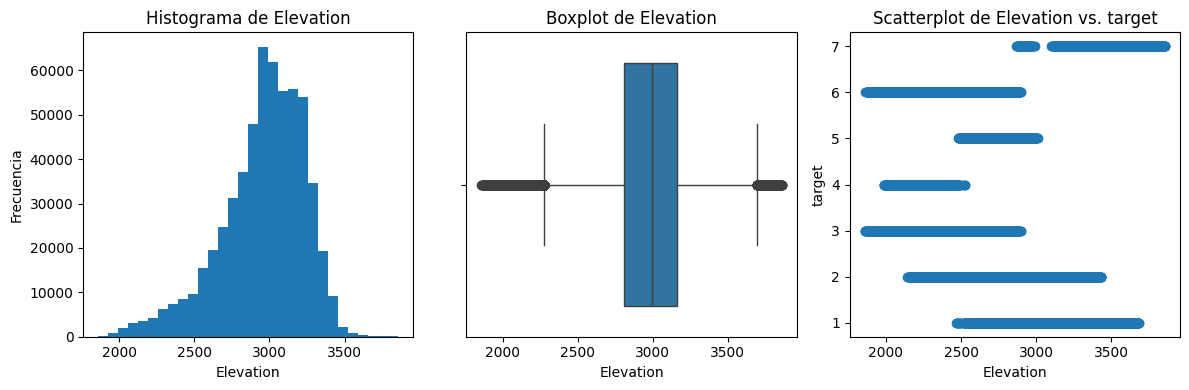

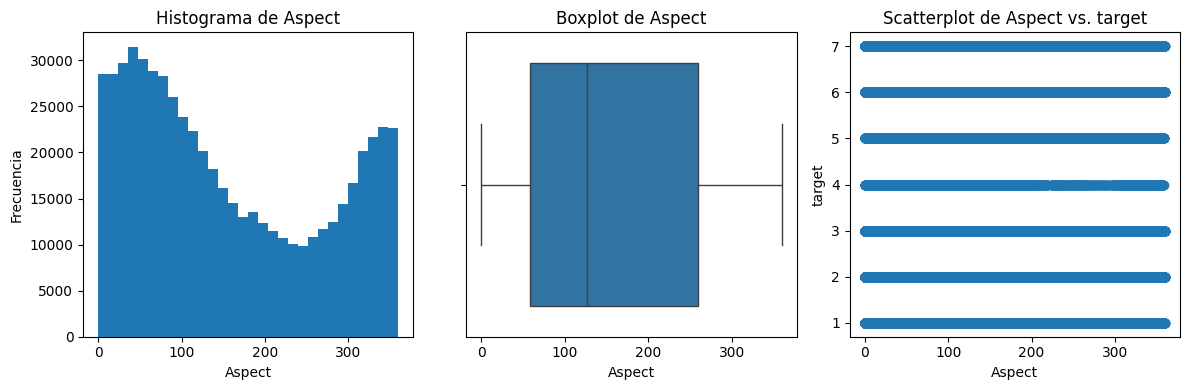

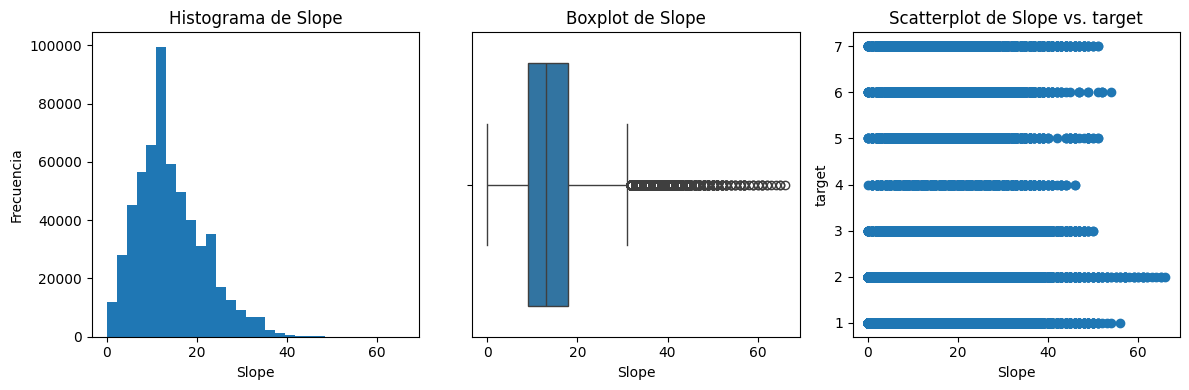

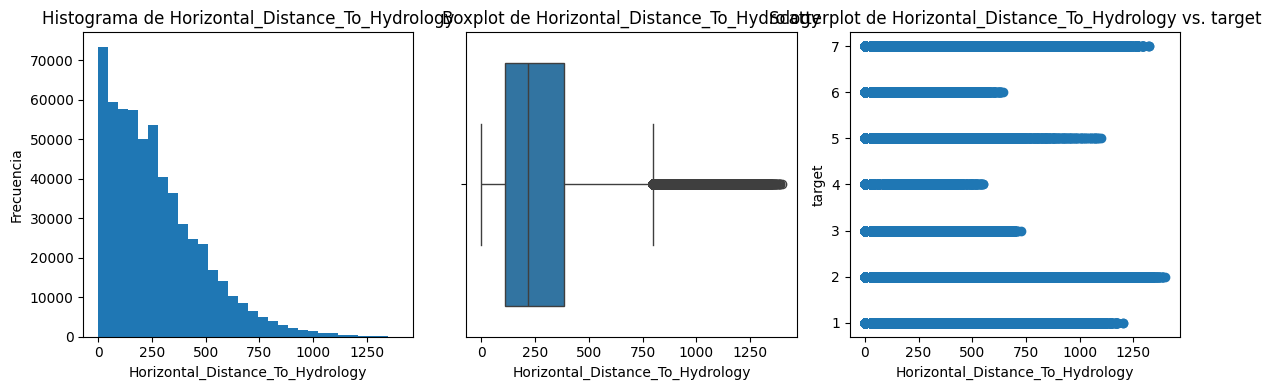

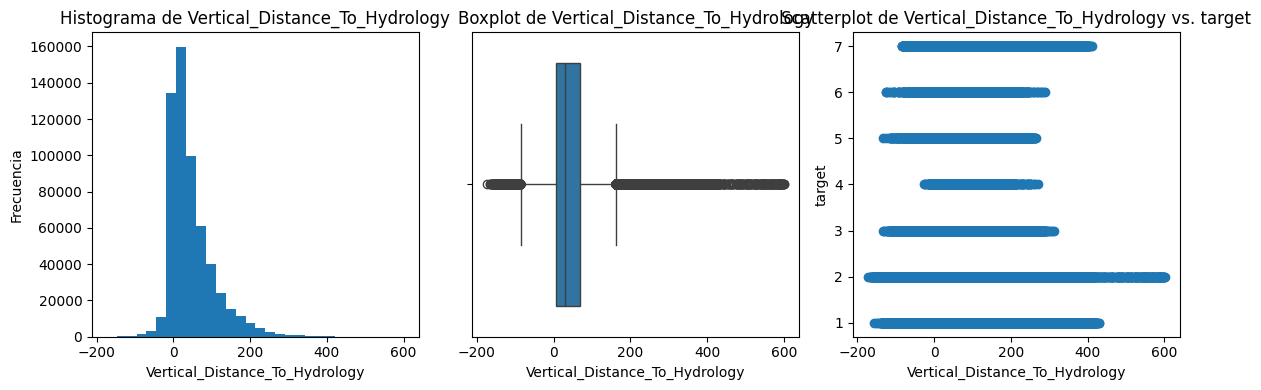

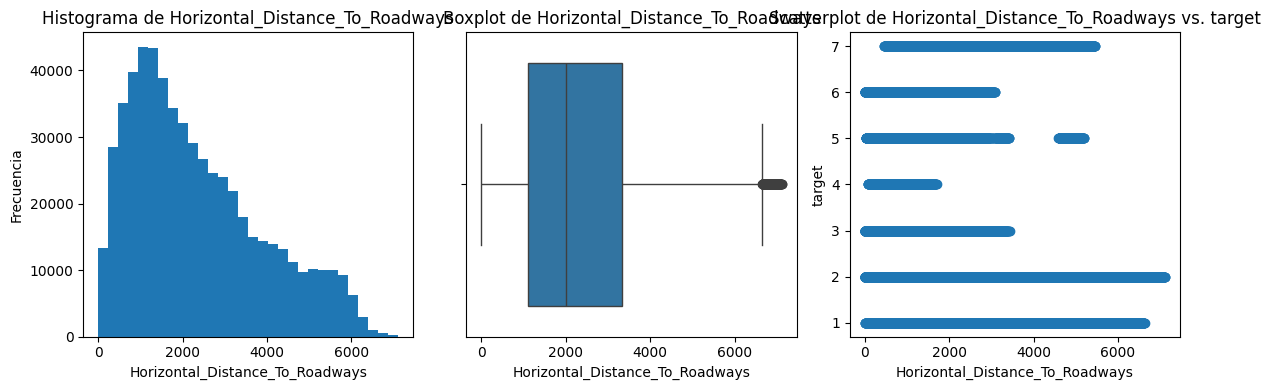

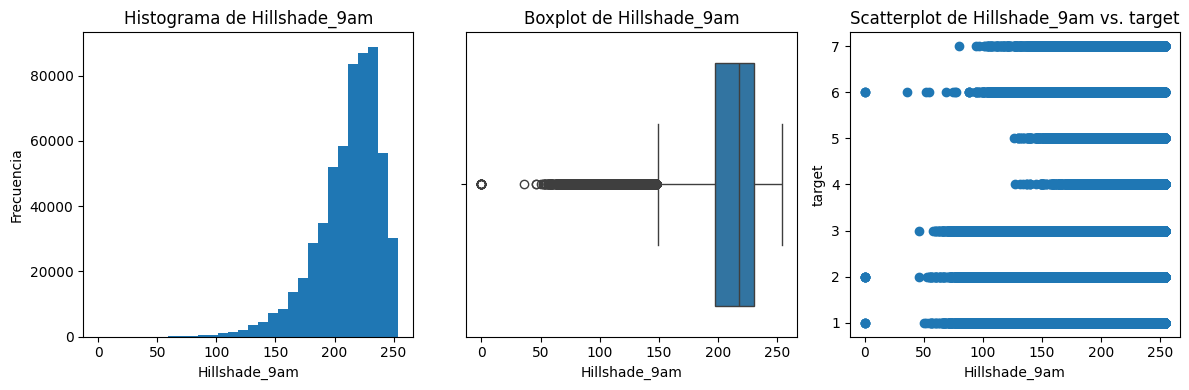

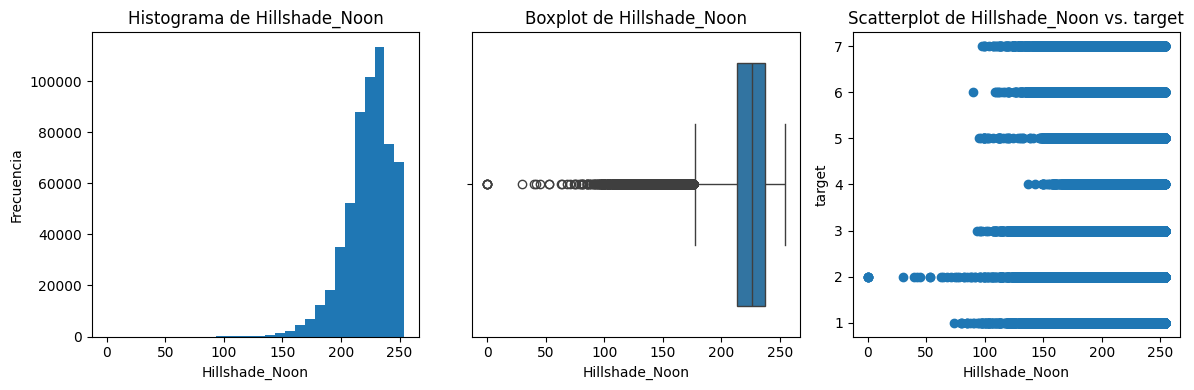

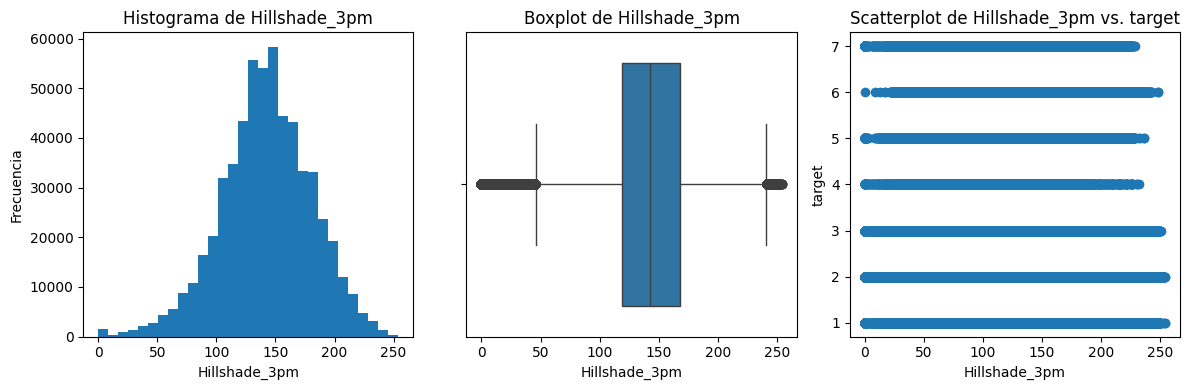

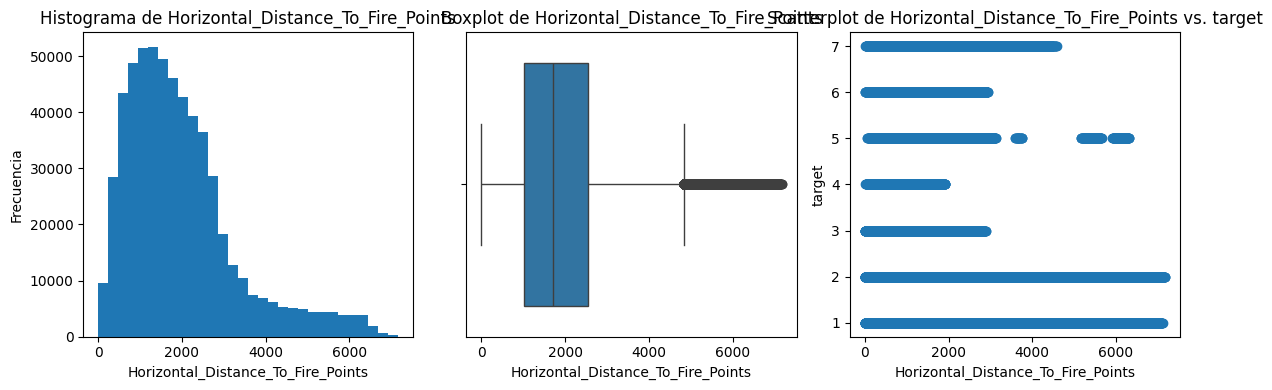

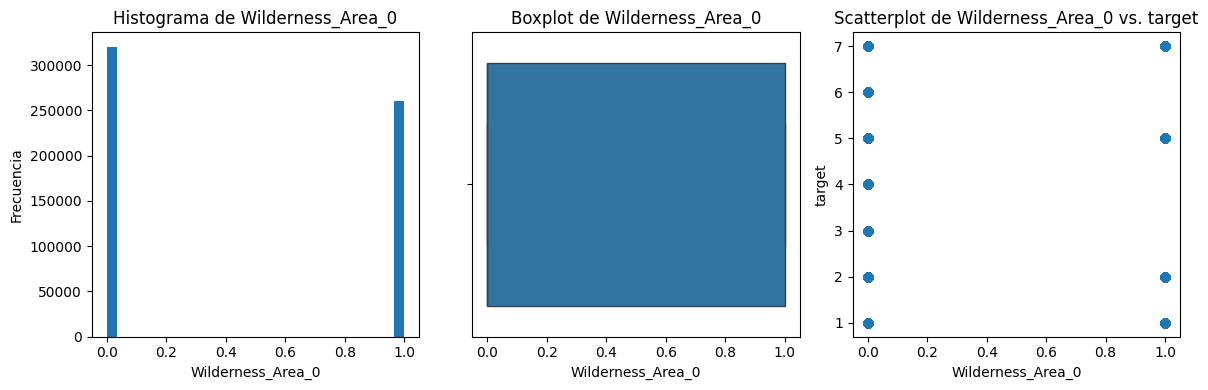

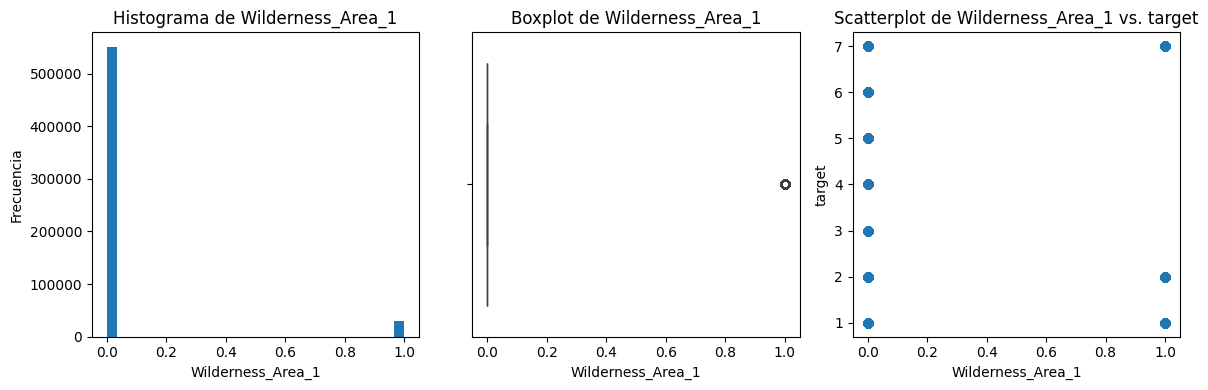

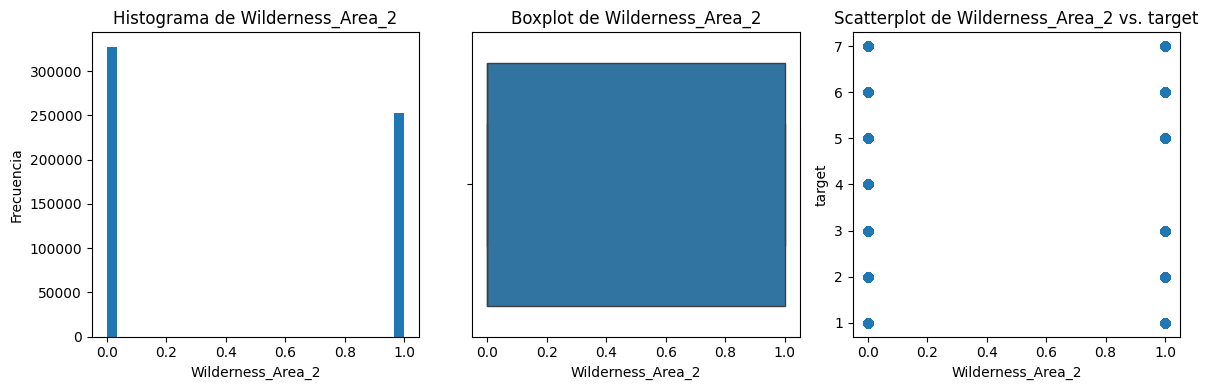

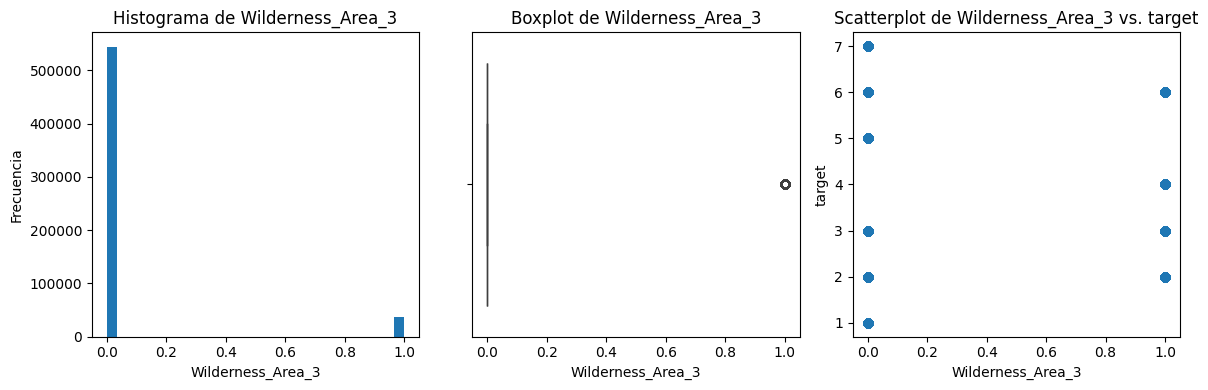

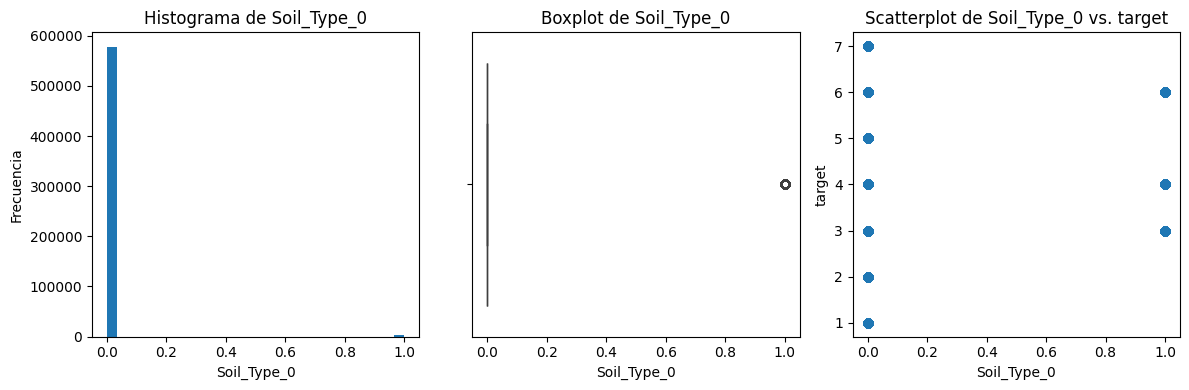

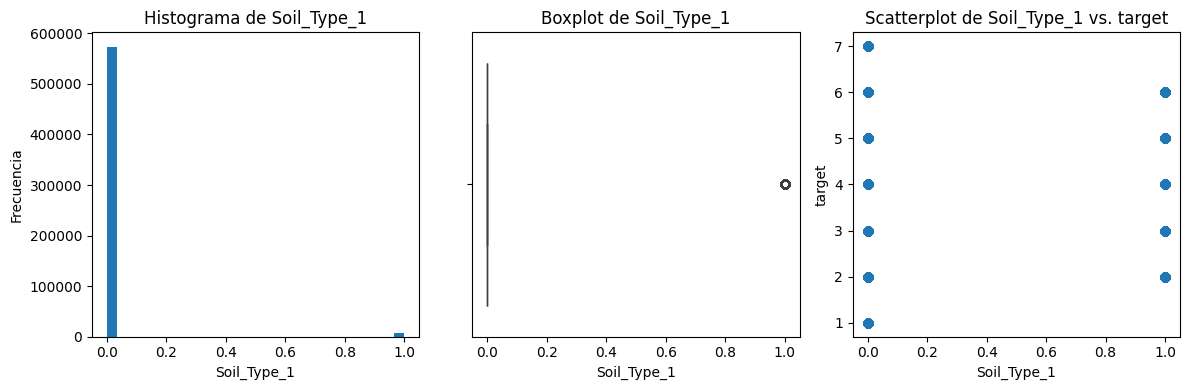

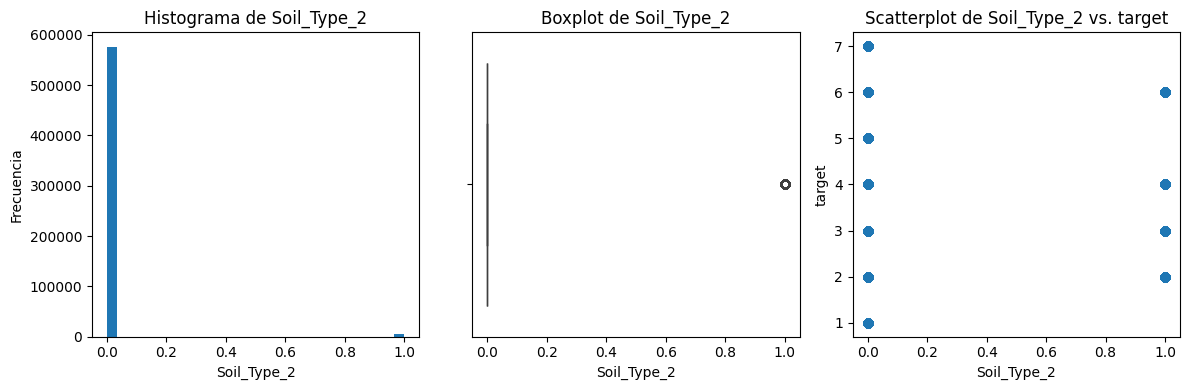

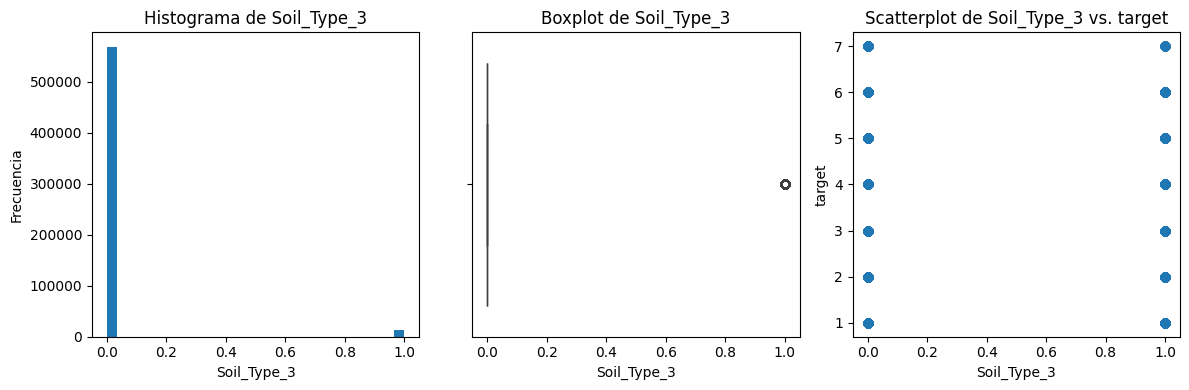

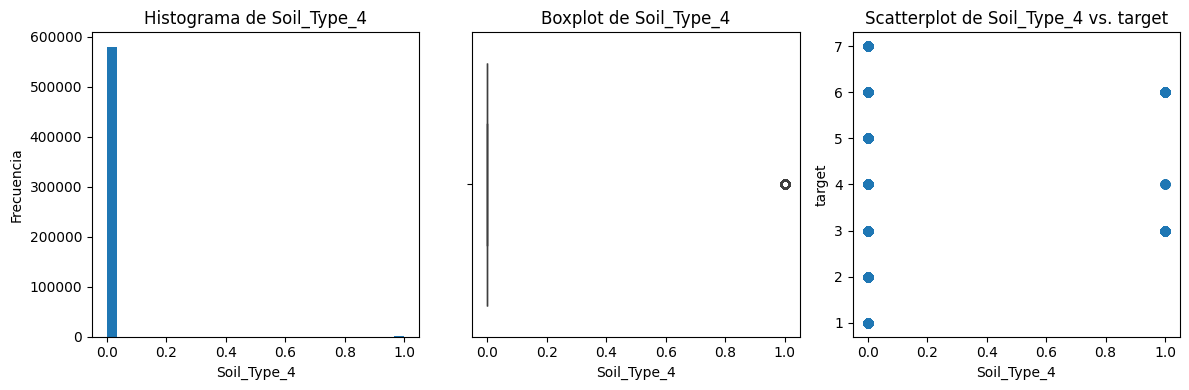

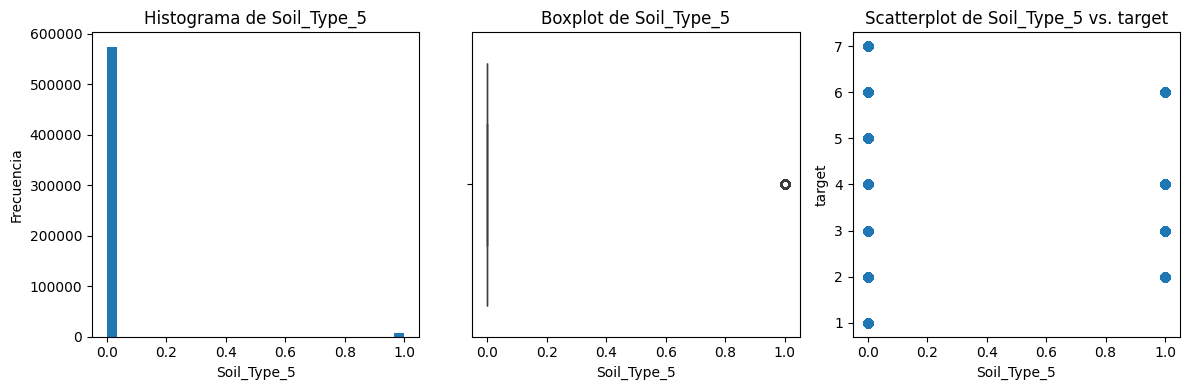

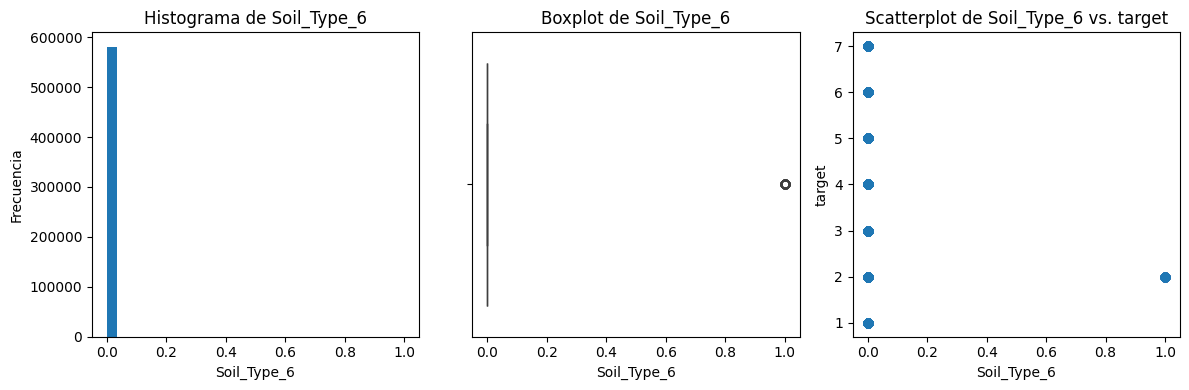

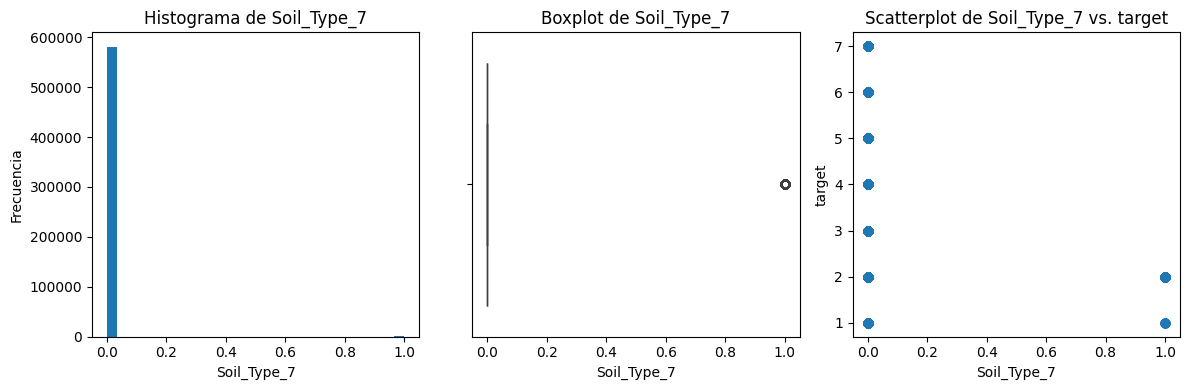

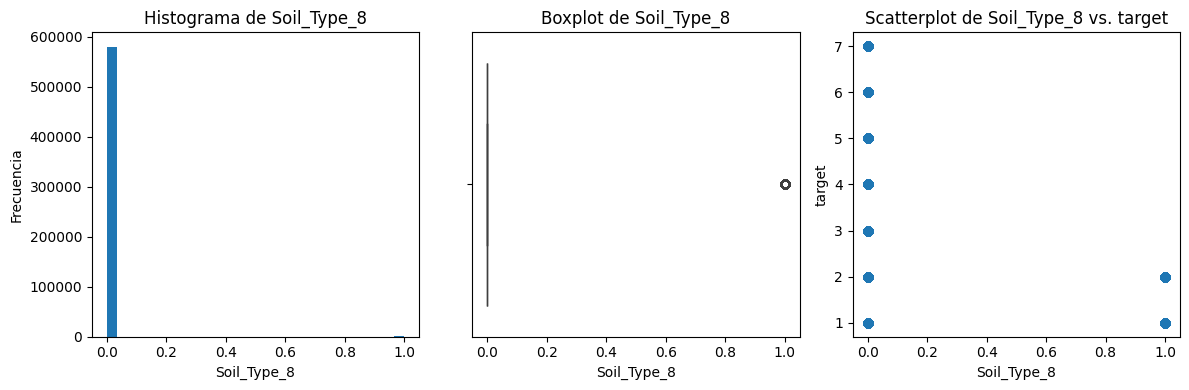

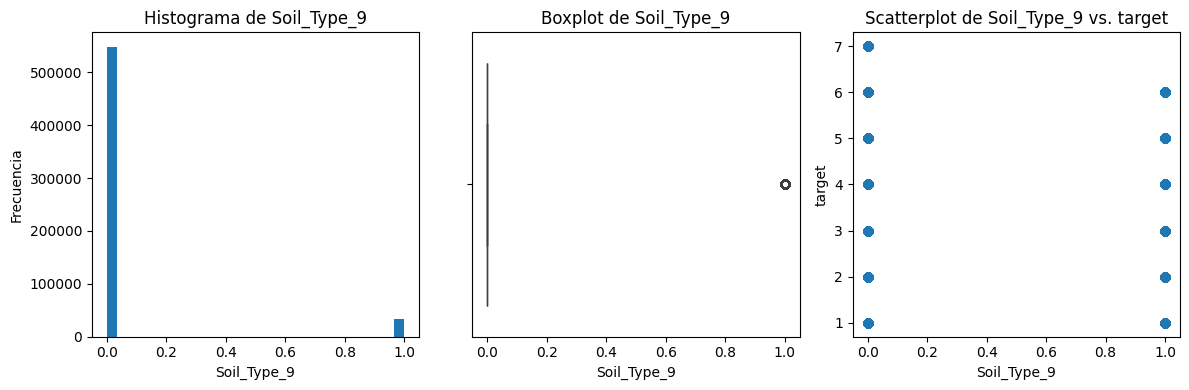

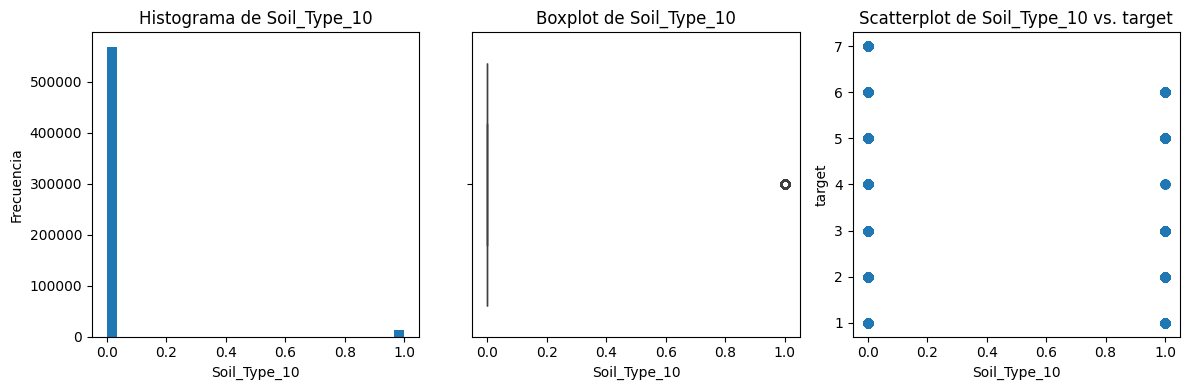

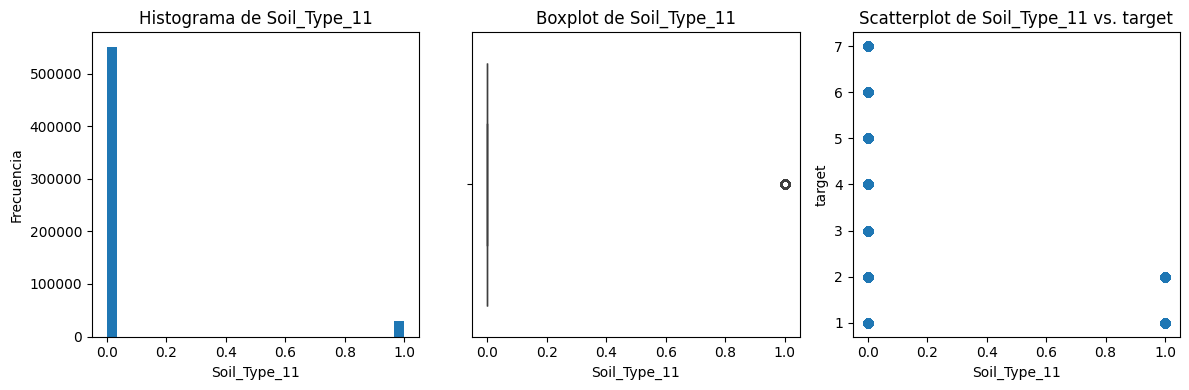

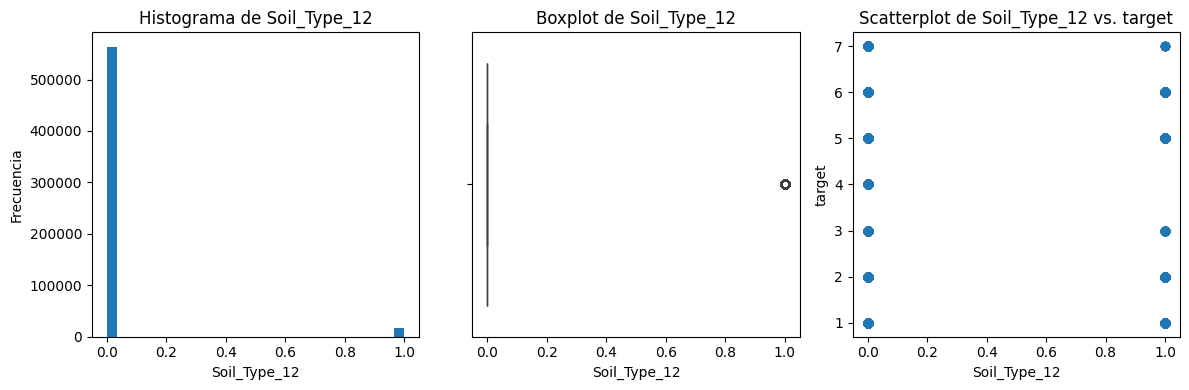

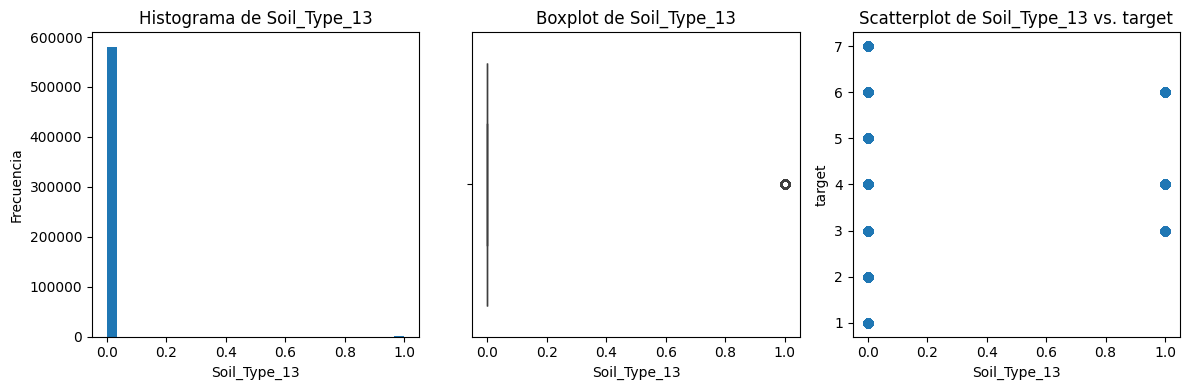

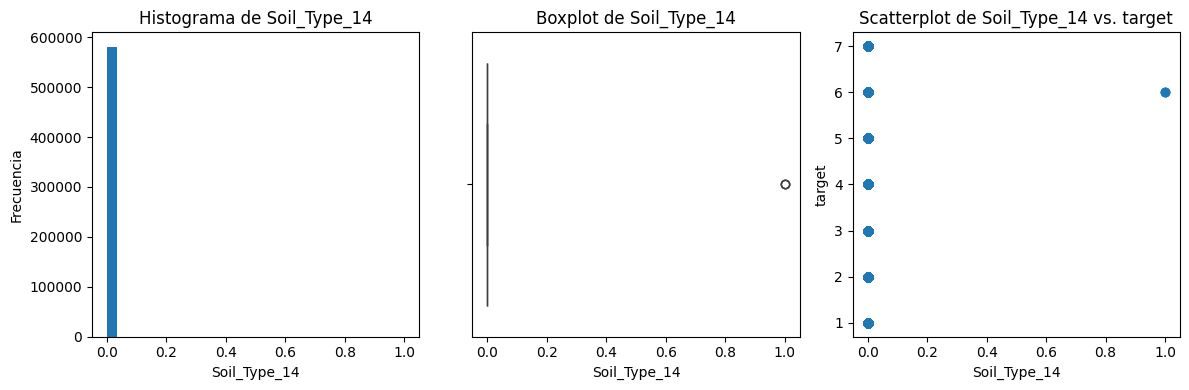

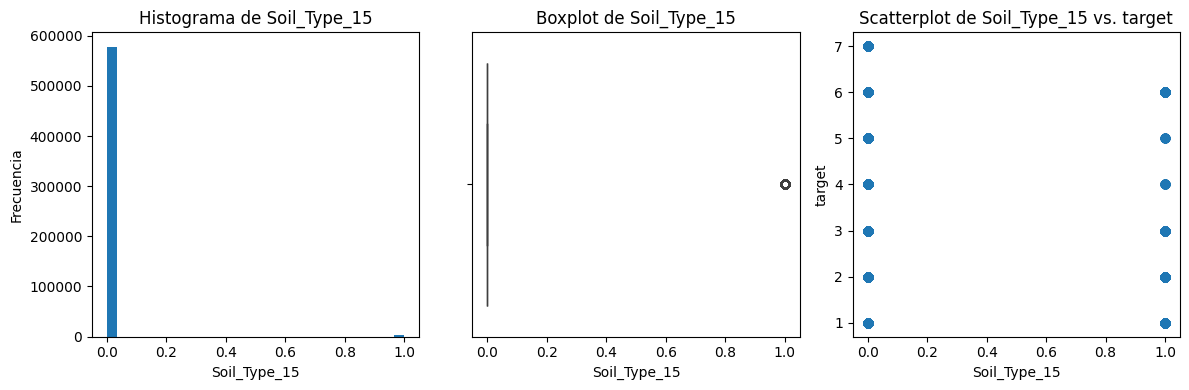

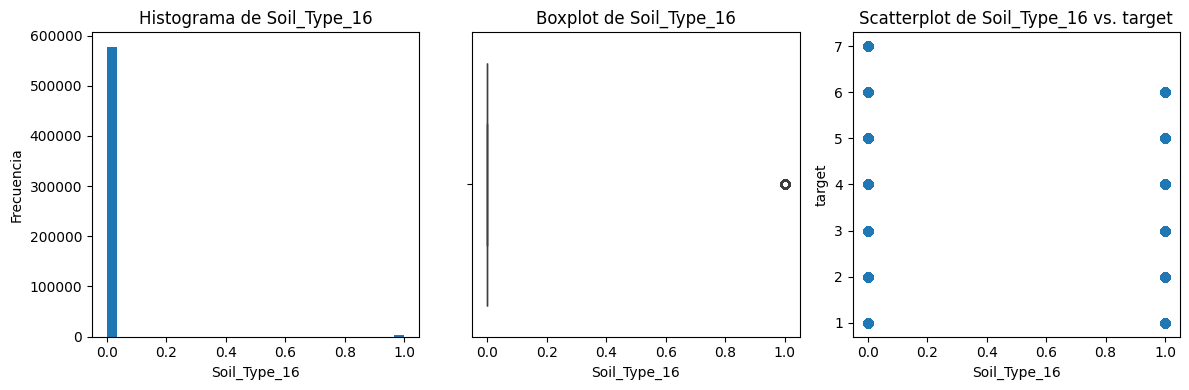

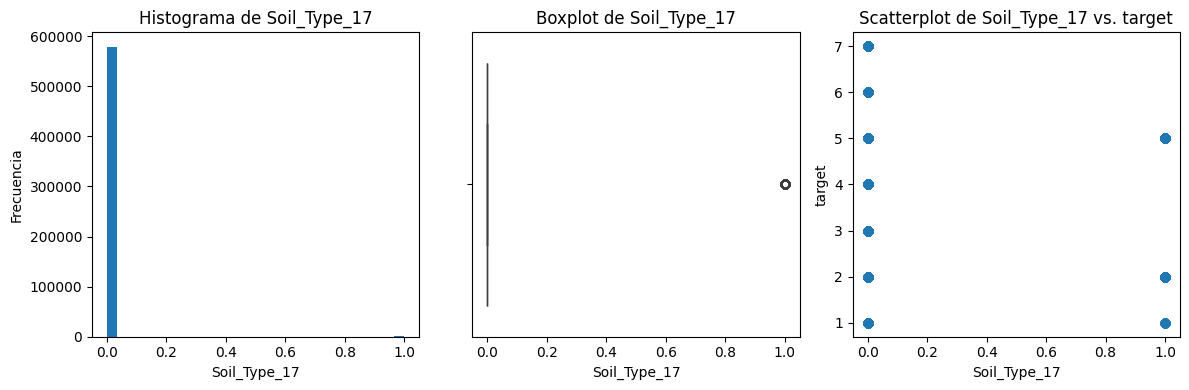

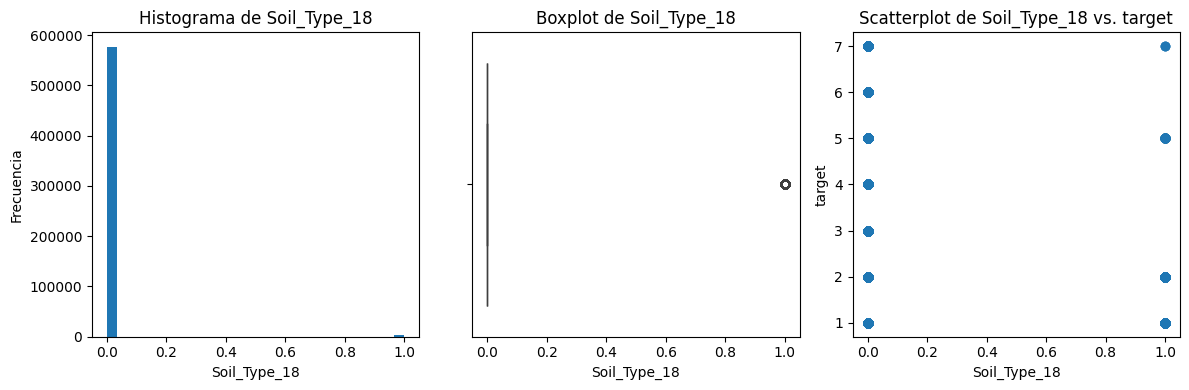

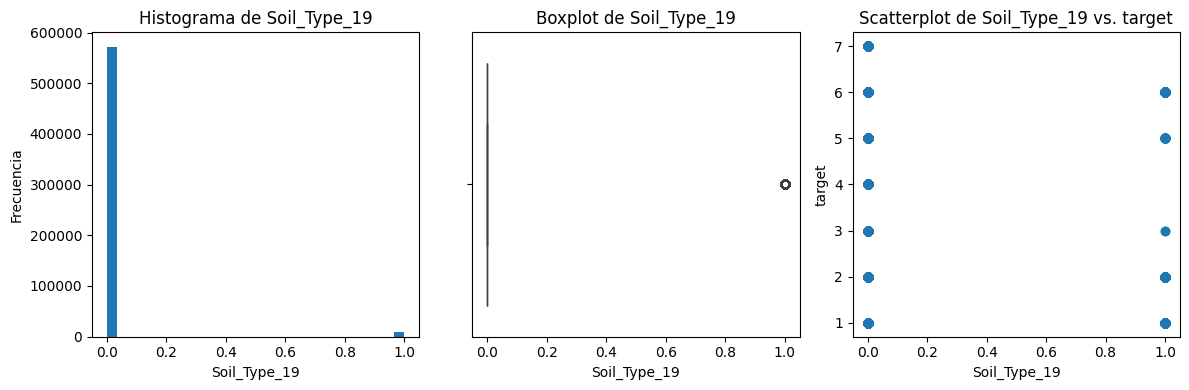

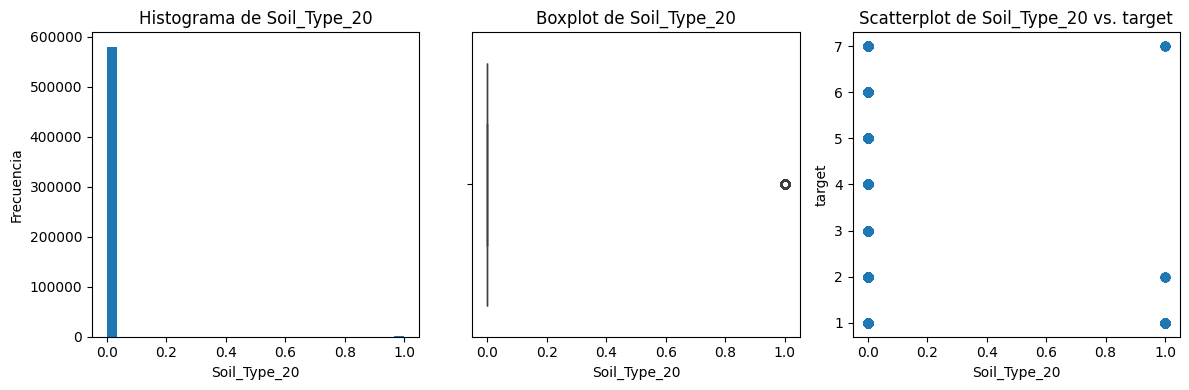

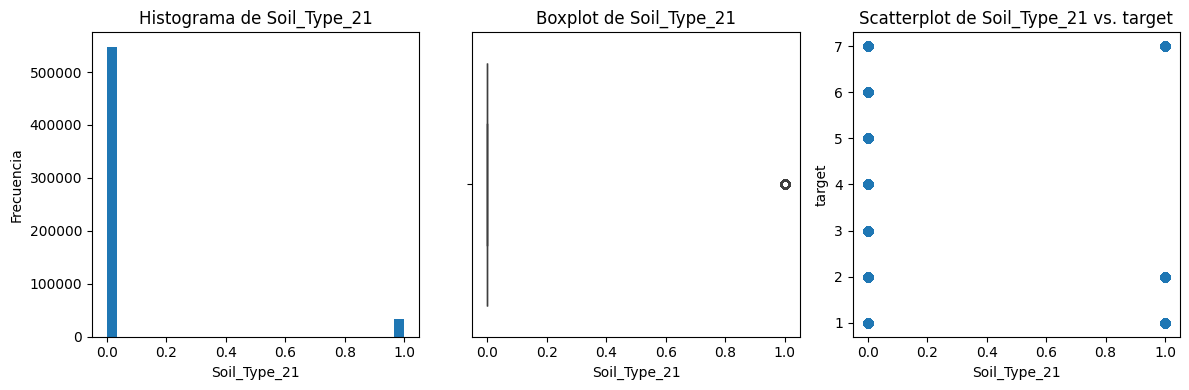

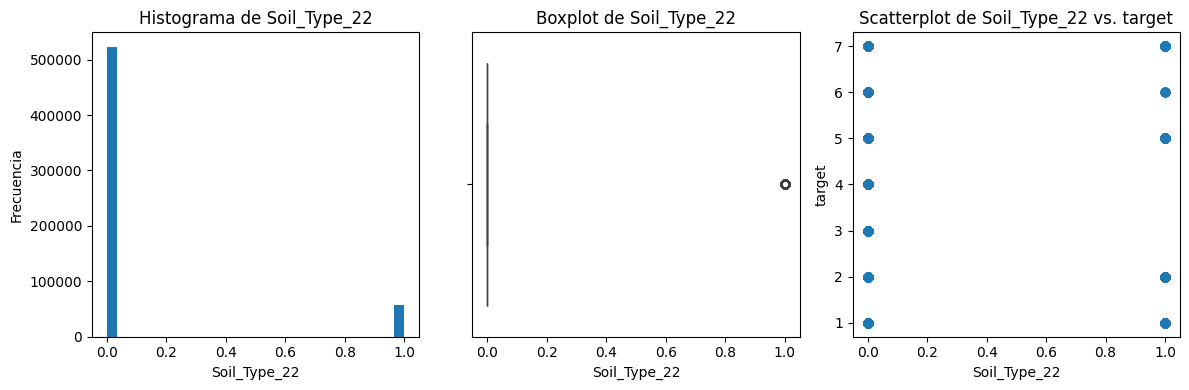

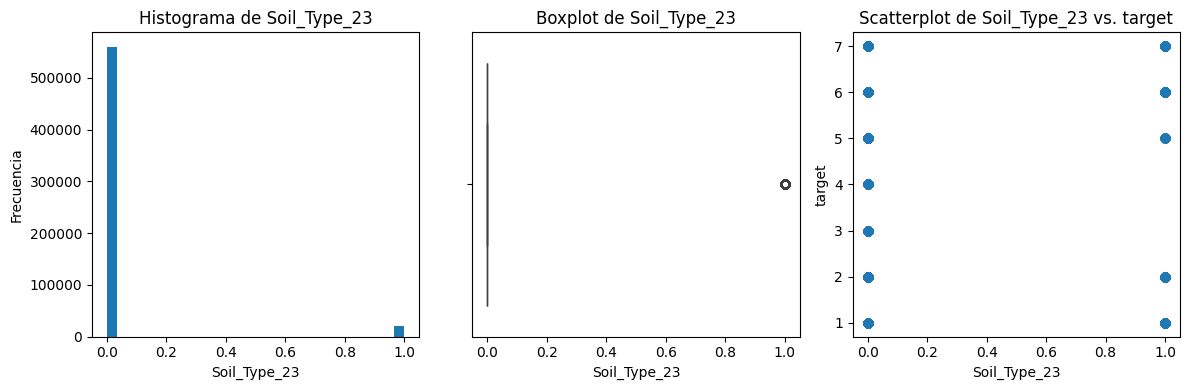

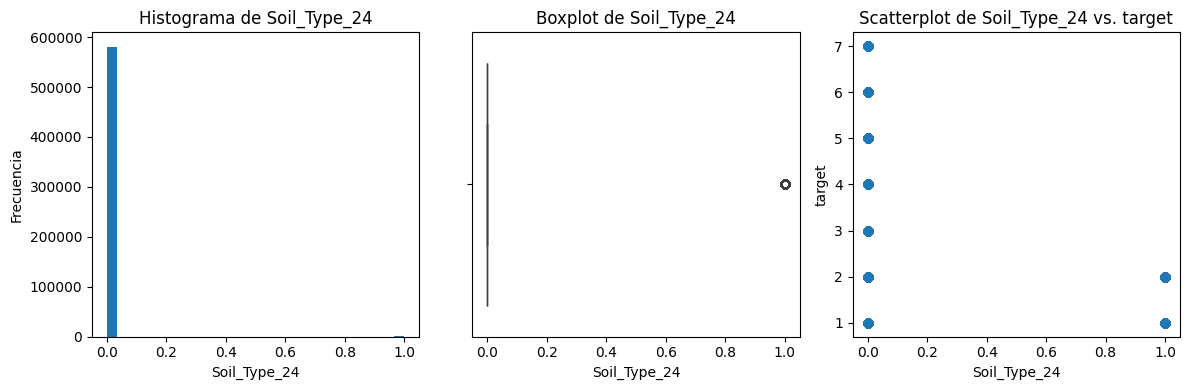

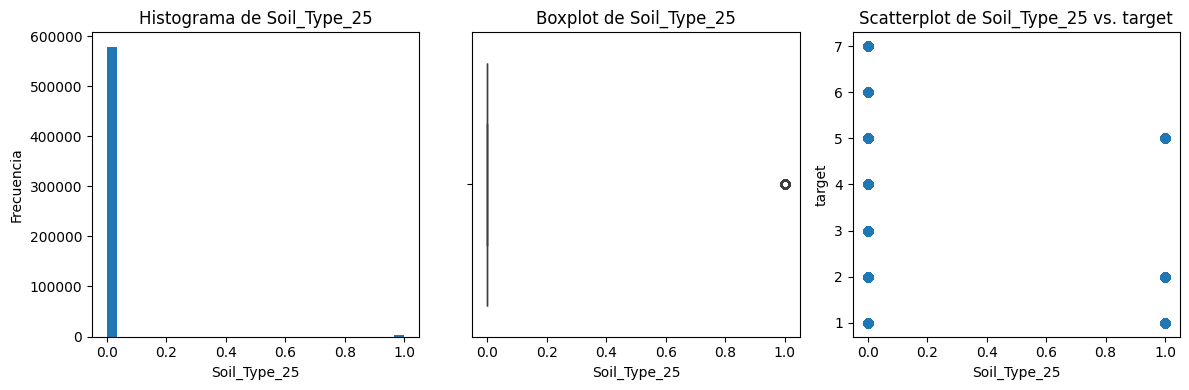

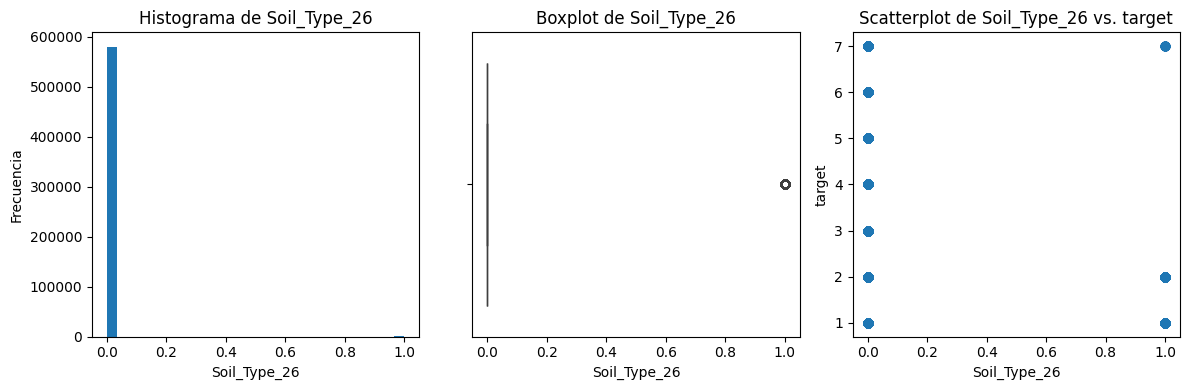

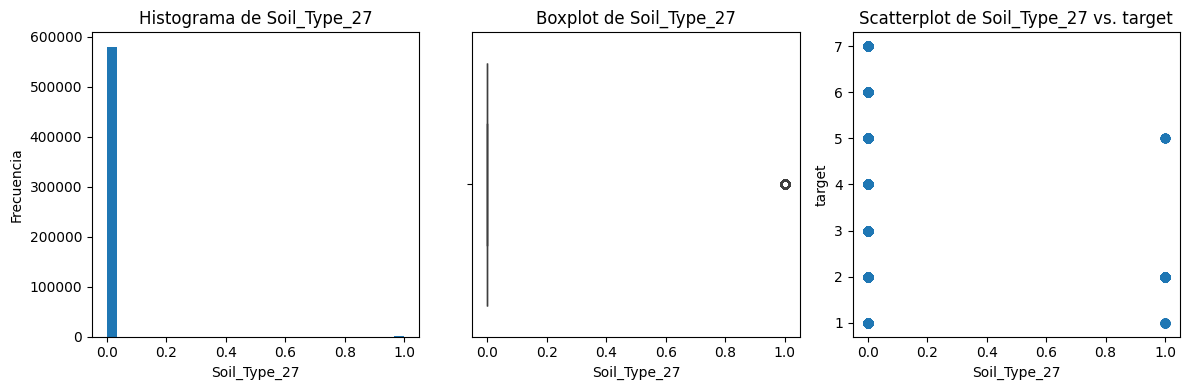

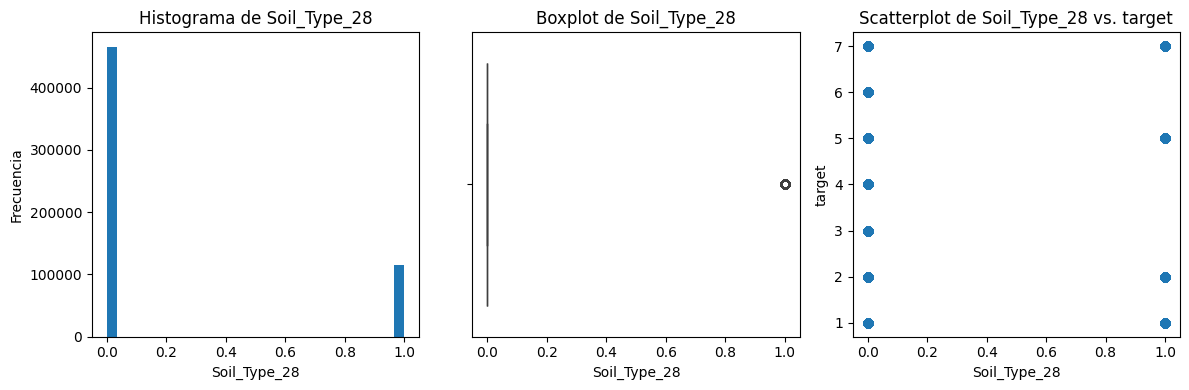

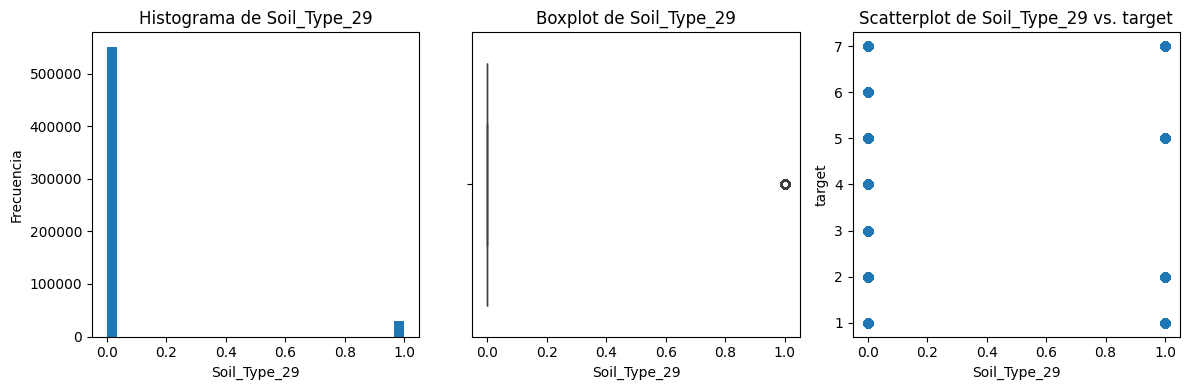

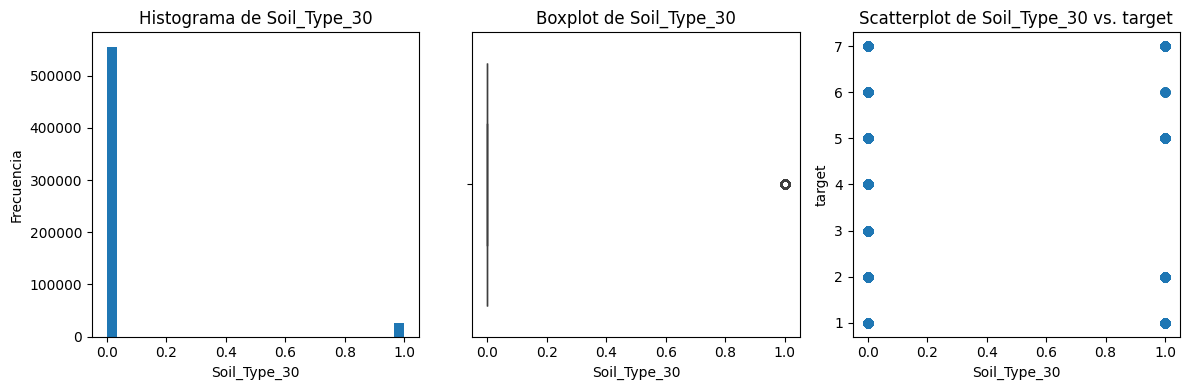

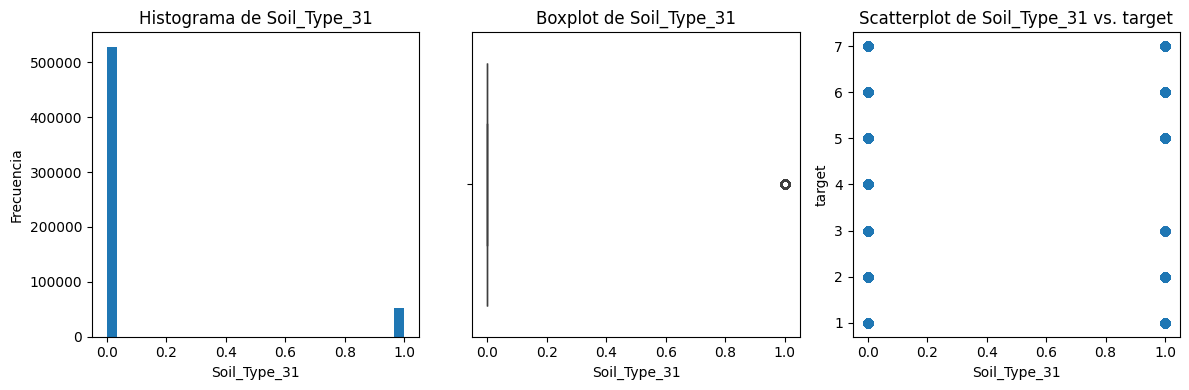

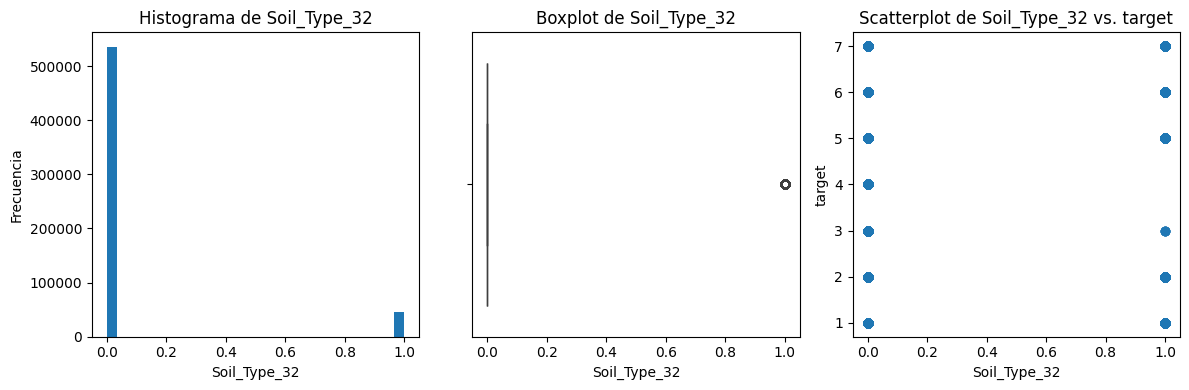

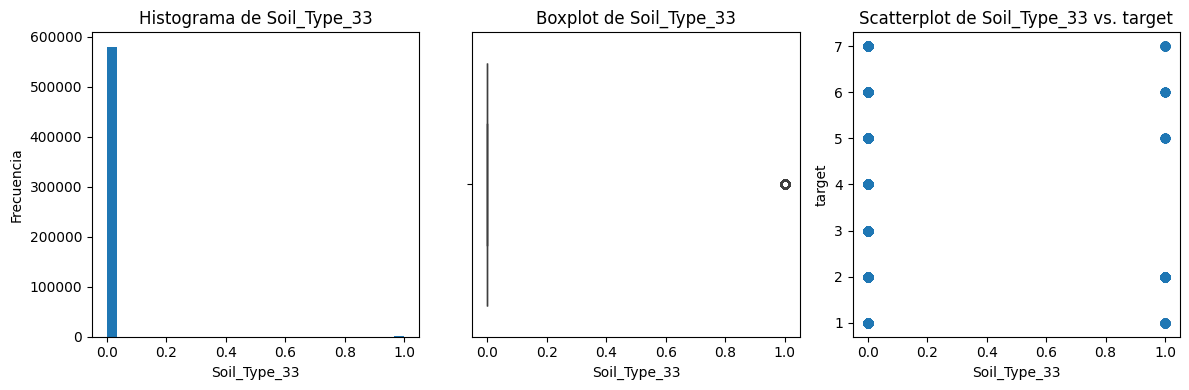

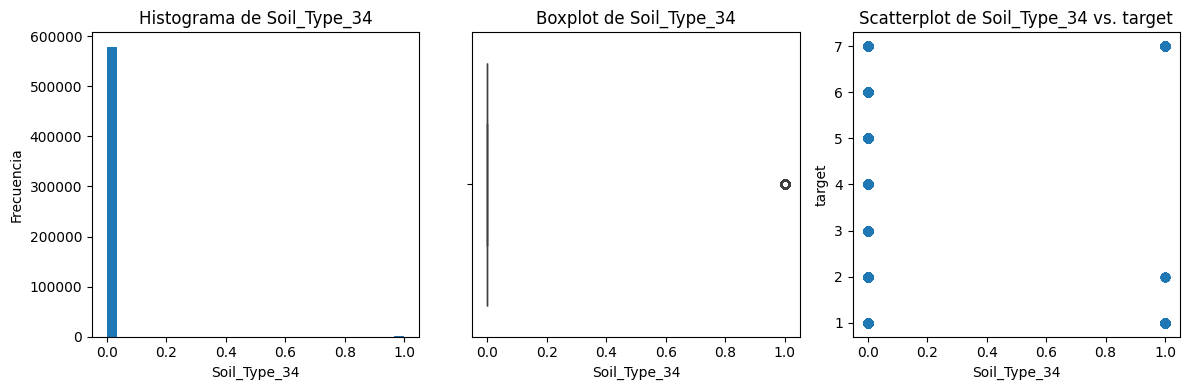

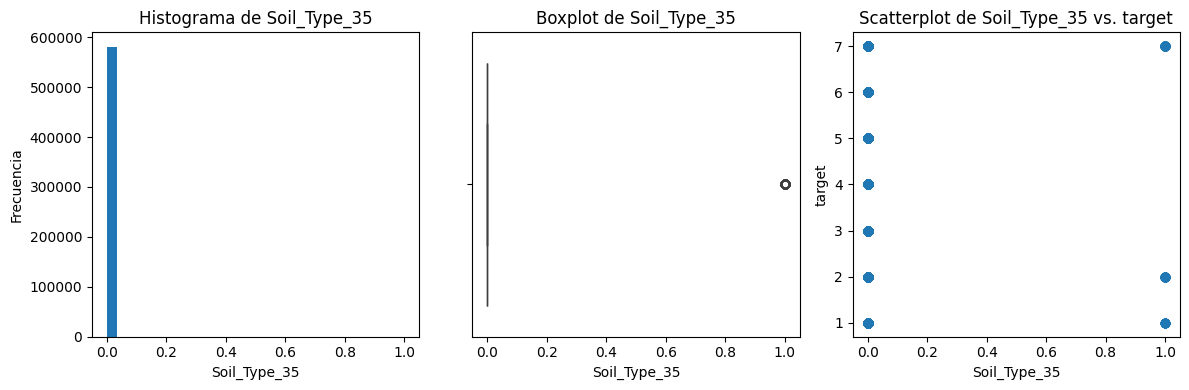

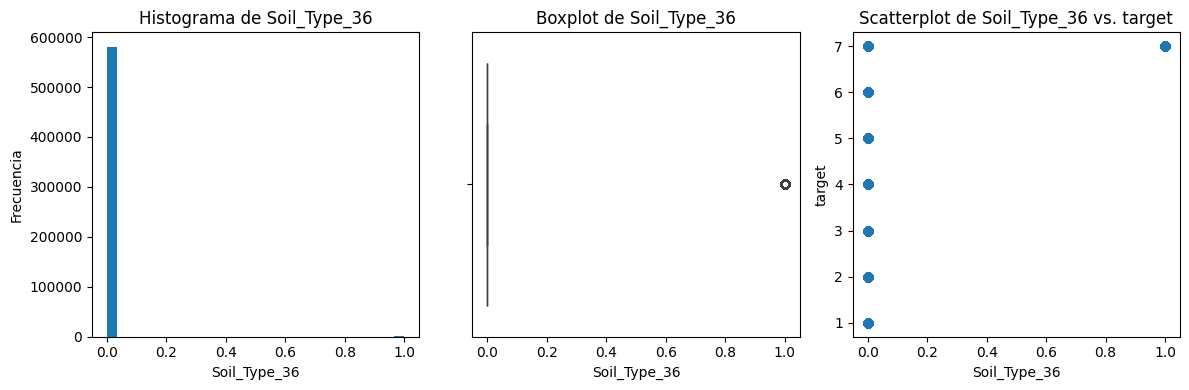

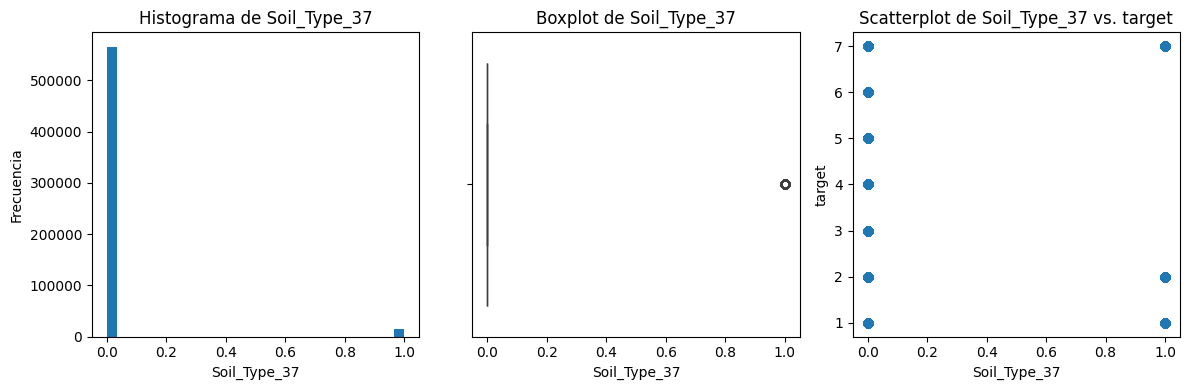

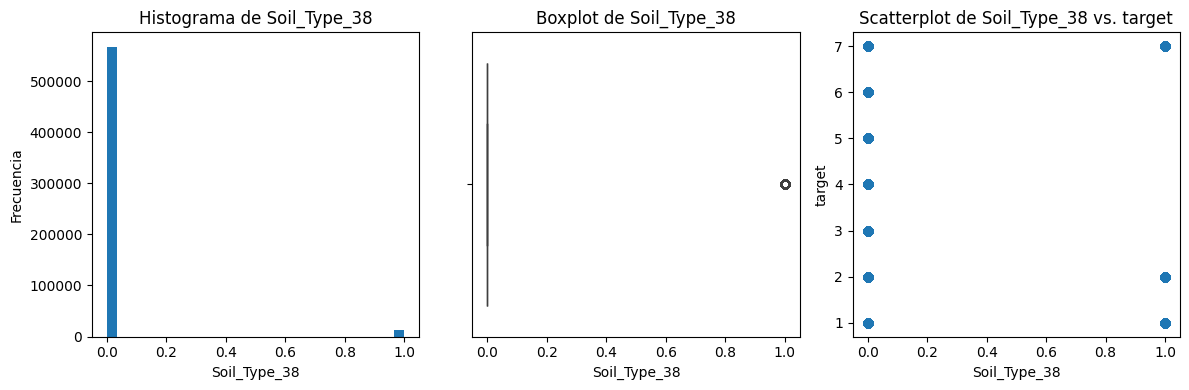

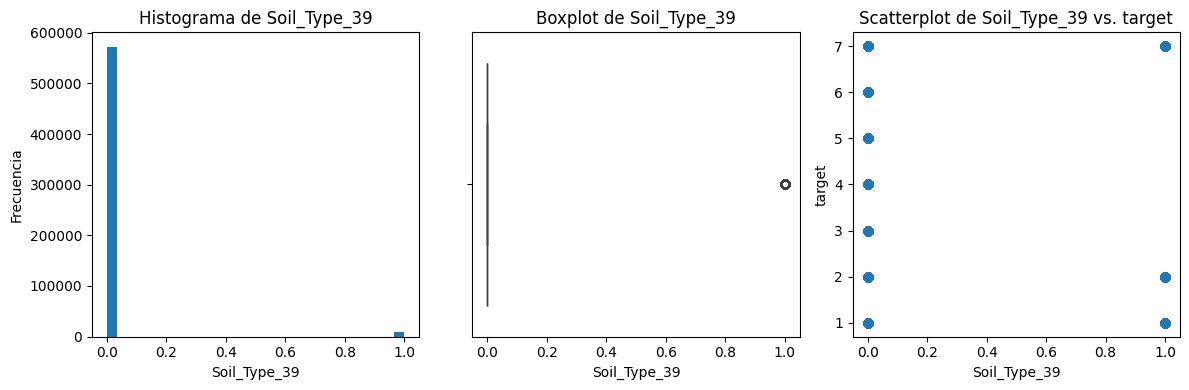

In [21]:
# Análisis univariado mediante histogramas, boxplots y scatterplots
for col in numerical_cols:
    if col != 'target':  # Exclude the target variable itself
        plt.figure(figsize=(12, 4))

        # Histograma
        plt.subplot(1, 3, 1)
        plt.hist(df[col], bins=30)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')

        # Scatterplot (comparando con la variable objetivo)
        plt.subplot(1, 3, 3)
        plt.scatter(df[col], df['target'])
        plt.title(f'Scatterplot de {col} vs. target')
        plt.xlabel(col)
        plt.ylabel('target')

        plt.tight_layout()
        plt.show()


# Análisis bivariado respecto a la variable objetivo

verifica la distribución de las clases

Es un problema balanceado?

target
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


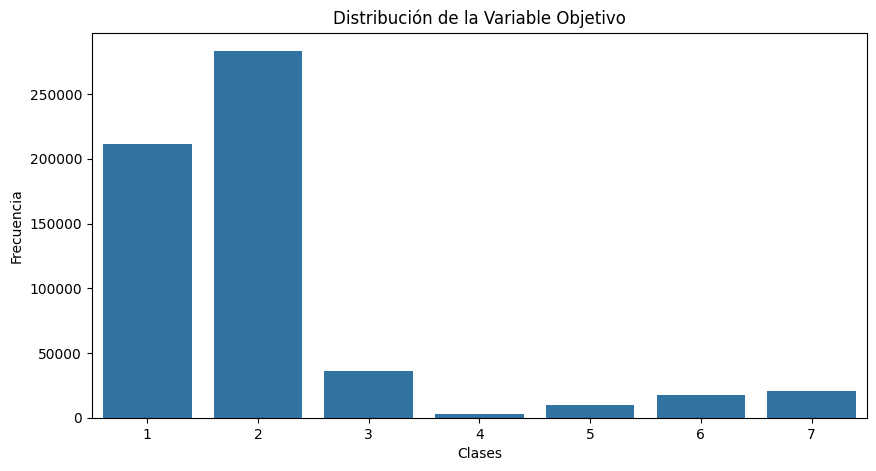

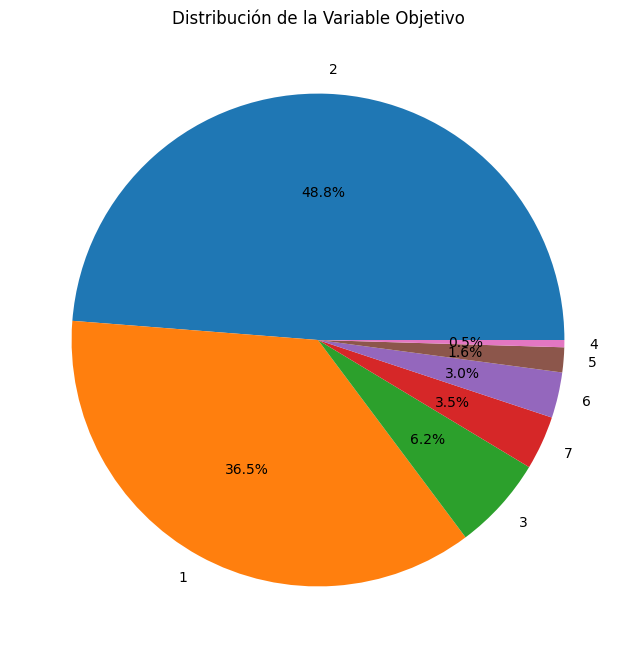

In [22]:
# Analizar la distribución de la variable objetivo
print(df['target'].value_counts())

# Gráfico de barras de la distribución de la variable objetivo
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de pastel de la distribución de la variable objetivo
plt.figure(figsize=(8, 8))
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de la Variable Objetivo')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()


Si existe un desbalance en el comportamiento de la variable objetivo, aproximadamente el 80% de las observaciones son 1 o 2.

# Dividir el DataFrame en conjuntos de entrenamiento y prueba (70%-30%) manteniendo la estratificación

In [23]:
# Dividir el DataFrame en conjuntos de entrenamiento y prueba (70%-30%) manteniendo la estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



# Aplicar normalización: StandardScaler (Z-Score) y Min-Max Scaling

Ajustar y transformar el conjunto de entrenamiento

In [25]:
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

#Aplicar normalización: StandardScaler (Z-Score) y Min-Max Scaling
X_train_std = scaler_std.fit_transform(X_train)
X_train_mm = scaler_mm.fit_transform(X_train)



# Transformar el conjunto de prueba


In [26]:
#Transformar el conjunto de prueba
X_test_std = scaler_std.transform(X_test)
X_test_mm = scaler_mm.transform(X_test)


## Paso 2: Modelos de Regresión Regularizada

Ahora que se ha realizado un análisis exploratorio completo y se han generado conjuntos de entrenamiento y prueba con datos escalados, en este paso implementaremos modelos de regresión regularizada (Ridge y Lasso) sobre un problema simplificado.

**Objetivo:**  
- Seleccionar un subconjunto de predictores (por ejemplo, las primeras 5 columnas) y transformar la variable objetivo en un problema binario.  
- Utilizar los datos escalados (por ejemplo, el conjunto obtenido con StandardScaler) para ajustar modelos Ridge y Lasso.  
- Comparar el efecto del parámetro de regularización (alpha) sobre los coeficientes.

*Pistas:*  
- Transforme la variable target a binario, por ejemplo: asignar 1 si el valor es mayor que un umbral (p. ej., 2) y 0 en caso contrario.  
- Observe cómo varían los coeficientes al modificar el parámetro alpha.
  
_Función objetivo de Ridge:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} \beta_j^2
$$
_Función objetivo de Lasso:_  
$$
\text{Objetivo: } RSS + \lambda \sum_{j=1}^{p} |\beta_j|
$$


In [27]:
# Seleccionar las primeras 5 variables
X_train_subset = X_train_std[:, :5]
X_test_subset = X_test_std[:, :5]

# Convertir la variable objetivo a binaria
y_train_binary = np.where(y_train > 2, 1, 0)
y_test_binary = np.where(y_test > 2, 1, 0)


# Modelo Ridge

In [54]:
ridge_model_1 = Ridge(alpha=1.0)  # Ajuste con alpha = 1.0 (puede variar este parámetro)
ridge_model_1.fit(X_train_subset, y_train_binary)

coeficientes = ridge_model_1.coef_

ridge_model_10 = Ridge(alpha=1000)  # Ajuste con alpha = 1.0 (puede variar este parámetro)
ridge_model_10.fit(X_train_subset, y_train_binary)

coeficientes = ridge_model_10.coef_

ridge_model_01 = Ridge(alpha=0.001)  # Ajuste con alpha = 1.0 (puede variar este parámetro)
ridge_model_01.fit(X_train_subset, y_train_binary)

coeficientes1 = ridge_model_1.coef_
coeficientes10 = ridge_model_10.coef_
coeficientes01 = ridge_model_01.coef_

print("Coeficientes aplha 1:", coeficientes1)
print("Coeficientes aplha 10:", coeficientes10)
print("Coeficientes aplha 0.1:", coeficientes01)


Coeficientes aplha 1: [-0.14749998  0.01096182  0.03756682 -0.00143453  0.03491748]
Coeficientes aplha 10: [-0.14710319  0.0109336   0.03759739 -0.00149624  0.0348256 ]
Coeficientes aplha 0.1: [-0.14750038  0.01096185  0.03756679 -0.00143447  0.03491757]


# Modelo Lasso

In [45]:
lasso_model = Lasso(alpha=0.1)  # Ajuste con alpha = 0.1 (puede variar este parámetro)
lasso_model.fit(X_train_subset, y_train_binary)

coeficientes = lasso_model.coef_
intercepto = lasso_model.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [-0.05356982  0.          0.         -0.          0.        ]
Intercepto: 0.14779645347522058


## Paso 3: Modelo de Clasificación - Regresión Logística Regularizada

En este paso se construirá un modelo de clasificación utilizando regresión logística regularizada. Aproveche los datos escalados obtenidos en el Paso 1.

**Objetivo:**  
- Ajustar un modelo de regresión logística (utilizando penalización L2 o L1) con el conjunto de entrenamiento completo.  
- Interpretar los coeficientes obtenidos, considerando que el parámetro C (inverso de la fuerza de regularización) controla la penalización: valores pequeños de C implican penalización fuerte, mientras que valores mayores permiten mayor flexibilidad.

*Pista:*  
- Use la versión estandarizada del conjunto de entrenamiento (X_train_std) para asegurar que la regularización actúe de manera equitativa en todos los predictores.


In [59]:
# Ajustar un modelo de regresión logística (utilizando penalización L2)
logreg_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg_model.fit(X_train_std, y_train)

# Obtener los coeficientes
coefficients = logreg_model.coef_

print("Coeficientes:", coefficients)


Coeficientes: [[ 1.96926207e+00 -3.90292782e-02 -5.30445883e-02 -2.95852989e-01
  -9.47199885e-02 -1.45763809e-01  2.79070337e-01 -6.81170010e-01
   6.26394223e-01 -1.38679958e-02  4.62729482e-01 -2.67793755e-02
   1.41126338e-01 -1.20446167e+00  2.00916106e-03 -7.09275787e-01
  -5.22867758e-01 -7.70559275e-02 -1.28874159e-02 -1.29023514e-01
  -1.21173944e-01  4.66512145e-03  5.61630039e-02  5.00839137e-02
   1.54505593e-02 -1.23019721e-01 -2.37178143e-03 -1.49007682e-01
   8.02818811e-05  4.31136142e-02  3.09156746e-02 -8.29248658e-03
   6.57320184e-02  1.22791996e-01  1.37100424e-01  2.84985186e-01
   2.69702773e-01  1.26157780e-01 -2.03552082e-02 -4.42766480e-03
   3.79108246e-02 -1.72451369e-02 -4.08470500e-02 -5.51805592e-02
   1.28389019e-01  4.44171902e-02  1.56287742e-01 -8.21771551e-02
  -8.48653296e-02 -3.07451731e-02 -2.88403332e-01 -1.46262264e-01
  -1.40517300e-01 -1.81891705e-01]
 [-1.54683659e+00 -3.58246631e-02  1.14833964e-01  3.21473538e-01
   3.38156013e-02  1.259867

## Paso 4: Validación Cruzada

Utilice la técnica de validación cruzada con Stratified K-Folds para evaluar el desempeño del modelo de clasificación ajustado.

**Objetivo:**  
- Configurar una validación cruzada con 5 folds, que preserve la distribución de la variable objetivo.  
- Obtener predicciones a través de `cross_val_predict` y calcular las métricas: accuracy, recall, F1-score, matriz de confusión y classification report.

*Pista:*  
- Asegúrese de utilizar el conjunto de entrenamiento estandarizado (X_train_std) y la variable objetivo (y_train).

# Validación Cruzada con StratifiedKFold

In [60]:
# Configurar la validación cruzada StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Obtener las predicciones a través de cross_val_predict
y_pred = cross_val_predict(logreg_model, X_train_std, y_train, cv=skf)

# Calcular las métricas
accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred, average='weighted')  # Usar average='weighted' para multiclase
f1 = f1_score(y_train, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7151494438270208
Recall: 0.7151494438270208
F1-score: 0.701186314202947
Matriz de Confusión:
[[102138  43140    123      0     16      1   2870]
 [ 34900 158064   4530      5    218    351    242]
 [     0   2628  21250    223      4    923      0]
 [     0      0   1137    584      0    202      0]
 [   113   5828    605      0     98      1      0]
 [     0   4300   6725     33     21   1078      0]
 [  6576     84     52      0      0      0   7645]]
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70    148288
           2       0.74      0.80      0.77    198310
           3       0.62      0.85      0.71     25028
           4       0.69      0.30      0.42      1923
           5       0.27      0.01      0.03      6645
           6       0.42      0.09      0.15     12157
           7       0.71      0.53      0.61     14357

    accuracy                           0.72    406708
   macro avg       

## Paso 5: Evaluación del Modelo en el Conjunto de Prueba

Utilice el modelo de regresión logística entrenado en el Paso 3 para verificar su estimación y realizar predicciones sobre el conjunto de prueba escalado.

**Objetivo:**  
- Calcular y visualizar las métricas de evaluación: accuracy, recall (macro), F1-score (macro), matriz de confusión y classification report.
- Compare los resultados obtenidos en el conjunto de prueba con los de la validación cruzada.

*Pista:*  
- Emplee las funciones `accuracy_score`, `recall_score`, `f1_score`, `confusion_matrix` y `classification_report` de scikit-learn.

In [61]:
# Predict on the test set
y_pred_test = logreg_model.predict(X_test_std)

# Calculate the evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Recall (macro): {recall_test}")
print(f"Test F1-score (macro): {f1_test}")
print(f"Test Confusion Matrix:\n{conf_matrix_test}")
print(f"Test Classification Report:\n{class_report_test}")


Test Accuracy: 0.7153192124105012
Test Recall (macro): 0.46278289727608335
Test F1-score (macro): 0.47990430368044007
Test Confusion Matrix:
[[43859 18531    59     0     2     0  1101]
 [14862 67788  2008     3    90   124   116]
 [    0  1149  9081    93     2   401     0]
 [    0     0   499   229     0    96     0]
 [   45  2521   244     0    37     1     0]
 [    0  1865  2819    18     9   499     0]
 [ 2897    40    26     0     0     0  3190]]
Test Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63552
           2       0.74      0.80      0.77     84991
           3       0.62      0.85      0.71     10726
           4       0.67      0.28      0.39       824
           5       0.26      0.01      0.02      2848
           6       0.45      0.10      0.16      5210
           7       0.72      0.52      0.60      6153

    accuracy                           0.72    174304
   macro avg       0.60    

Comparison of Cross-Validation and Test Set Results:
Metric          Cross-Validation     Test Set       
Accuracy        0.7151               0.7153         
Recall (macro)  0.7151               0.4628         
F1-score (macro) 0.7012               0.4799         


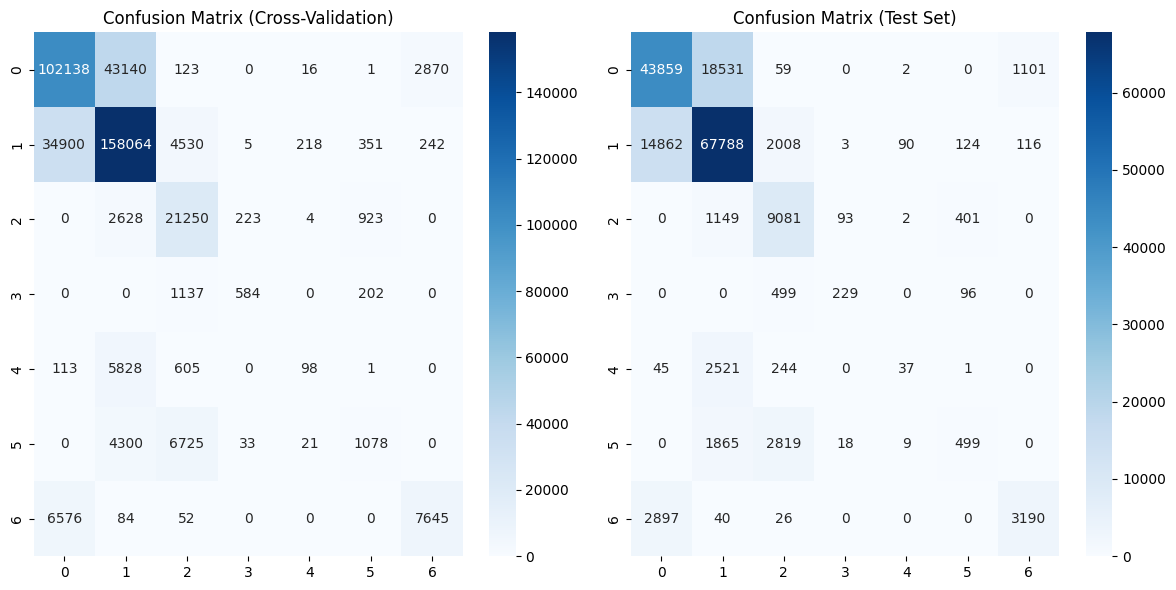

In [62]:
# Compare the resultadoss obtenidos en el conjunto de prueba con los de validación cruzada..

print("Comparison of Cross-Validation and Test Set Results:")
print(f"{'Metric':<15} {'Cross-Validation':<20} {'Test Set':<15}")
print(f"{'Accuracy':<15} {accuracy:<20.4f} {accuracy_test:<15.4f}")
print(f"{'Recall (macro)':<15} {recall:<20.4f} {recall_test:<15.4f}")
print(f"{'F1-score (macro)':<15} {f1:<20.4f} {f1_test:<15.4f}")

#Se puede realizar un análisis más detallado visualizando las matrices de confusión.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Cross-Validation)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()



# Evaluación en el conjunto de prueba



Test Accuracy: 0.7153192124105012
Test Recall (macro): 0.46278289727608335
Test F1-score (macro): 0.47990430368044007
Test Confusion Matrix:
[[43859 18531    59     0     2     0  1101]
 [14862 67788  2008     3    90   124   116]
 [    0  1149  9081    93     2   401     0]
 [    0     0   499   229     0    96     0]
 [   45  2521   244     0    37     1     0]
 [    0  1865  2819    18     9   499     0]
 [ 2897    40    26     0     0     0  3190]]
Test Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63552
           2       0.74      0.80      0.77     84991
           3       0.62      0.85      0.71     10726
           4       0.67      0.28      0.39       824
           5       0.26      0.01      0.02      2848
           6       0.45      0.10      0.16      5210
           7       0.72      0.52      0.60      6153

    accuracy                           0.72    174304
   macro avg       0.60    

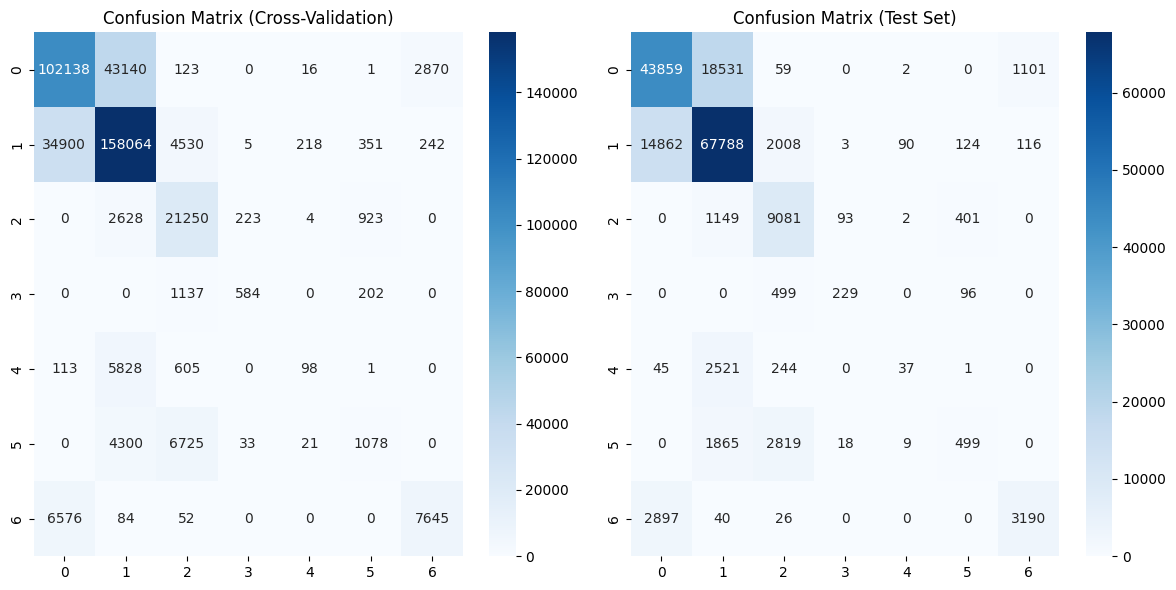

In [63]:
# prompt: Evaluación en el conjunto de prueba

# Predict on the test set
y_pred_test = logreg_model.predict(X_test_std)

# Calculate the evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Recall (macro): {recall_test}")
print(f"Test F1-score (macro): {f1_test}")
print(f"Test Confusion Matrix:\n{conf_matrix_test}")
print(f"Test Classification Report:\n{class_report_test}")

# Compare the results obtained on the test set with those of cross-validation.

print("Comparison of Cross-Validation and Test Set Results:")
print(f"{'Metric':<15} {'Cross-Validation':<20} {'Test Set':<15}")
print(f"{'Accuracy':<15} {accuracy:<20.4f} {accuracy_test:<15.4f}")
print(f"{'Recall (macro)':<15} {recall:<20.4f} {recall_test:<15.4f}")
print(f"{'F1-score (macro)':<15} {f1:<20.4f} {f1_test:<15.4f}")

# A more detailed analysis can be performed by visualizing the confusion matrices.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Cross-Validation)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()


# Conclusiones

Agrega las conclusiones más relevantes del análisis realizado y los resultados obtenidos.

- Conclusión 1
- Conclusión 2
- Conclusión 3
